# **Project 4: Introduction to Neural Networks: Bank Churn Prediction**
**By Kirti Kamerkar**

<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
#Installing the libraries with the specified version.
!pip install tensorflow scikit-learn matplotlib seaborn numpy pandas -q --user

In [2]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
#Connecting google drive and colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Defining dataframe with pandas read_csv()
df=pd.read_csv("/content/drive/MyDrive/AI_LM_BusinessApplication/bank-1.csv")

In [5]:
#To keep original data safe taking copy of it.
data=df.copy()

## Data Overview

**Observing Dataset**

In [ ]:
# Viewing first 5 rows of dataset
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [ ]:
#Viewing last 5 rows of dataset
data.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

**Checking Datatypes of dataset**

In [ ]:
#Viewing its shape.Number of columns and number of rows.
data.shape

(10000, 14)

**Observations**
- It has 10000 Rows and 14 Columns.

In [ ]:
# View the information about datatypes, column names and count,etc, of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Observations**
- Dataset has 14 columns and 10000 rows.
- RowNumber and CustomerId are unique Ids which are of type intger.
- It has three coulumns names,Surname,Geography and Gender, wih type object.
- It has two columns with float,9 columns with intger and 3 columns with object data type.
- Existed is target variable.
- It has no missing values.

**Checking Missing Values**

In [ ]:
# Checking for missing/null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Observations**:
- It has no missing values.

**Checking Duplicate Values**

In [ ]:
#Checking for duplicate values
data.duplicated().sum()

0

**Observation**
- Dataset has no missing and duplicate values.

**Checking Stastics of Dataset**

In [ ]:
# Observing stastical analysis of data
data.describe(include='all').T

count unique     top  freq           mean           std  \
RowNumber        10000.0    NaN     NaN   NaN         5000.5    2886.89568   
CustomerId       10000.0    NaN     NaN   NaN  15690940.5694  71936.186123   
Surname            10000   2932   Smith    32            NaN           NaN   
CreditScore      10000.0    NaN     NaN   NaN       650.5288     96.653299   
Geography          10000      3  France  5014            NaN           NaN   
Gender             10000      2    Male  5457            NaN           NaN   
Age              10000.0    NaN     NaN   NaN        38.9218     10.487806   
Tenure           10000.0    NaN     NaN   NaN         5.0128      2.892174   
Balance          10000.0    NaN     NaN   NaN   76485.889288  62397.405202   
NumOfProducts    10000.0    NaN     NaN   NaN         1.5302      0.581654   
HasCrCard        10000.0    NaN     NaN   NaN         0.7055       0.45584   
IsActiveMember   10000.0    NaN     NaN   NaN         0.5151      0.499797   
EstimatedSalary  10000.0    NaN     NaN   NaN  100090.239881  57510.492818   
Exited           10000.0    NaN     NaN   NaN         0.2037      0.402769   

                        min          25%         50%          75%         max  
RowNumber               1.0      2500.75      5000.5      7500.25     10000.0  
CustomerId       15565701.0  15628528.25  15690738.0  15753233.75  15815690.0  
Surname                 NaN          NaN         NaN          NaN         NaN  
CreditScore           350.0        584.0       652.0        718.0       850.0  
Geography               NaN          NaN         NaN          NaN         NaN  
Gender                  NaN          NaN         NaN          NaN         NaN  
Age                    18.0         32.0        37.0         44.0        92.0  
Tenure                  0.0          3.0         5.0          7.0        10.0  
Balance                 0.0          0.0    97198.54    127644.24   250898.09  
NumOfProducts           1.0          1.0         1.0          2.0         4.0  
HasCrCard               0.0          0.0         1.0          1.0         1.0  
IsActiveMember          0.0          0.0         1.0          1.0         1.0  
EstimatedSalary       11.58     51002.11  100193.915  149388.2475   199992.48  
Exited                  0.0          0.0         0.0          0.0         1.0

**Observations**
- RowNumber and CustomerId are unique identifier of customers.
- There are 2932 Surnames and "Smith" is most popular Surname.
- CreditScore is equally distributed with average value of 650.5.Min score is 350 and max is 850.There is little bit difference between average and median value which is acceptable.
- Unique values for Geography are 3.Most of the customers are from France(5014).
- Two types of Gender.Most of the customers are Male(5457).
- Age opf Customers ranges between 18 to 92 which is a relatively wide age distribution.Average age is 39yrs.Since the mean (38.92) is slightly higher than the median (37.0), the distribution might be slightly skewed to the right.
- Tenure is in between 0 to 10ys.Average tenure are 5yrs which is same as Median.There is no skewness in data.
- Balance of the customers ranges between 0 to $250898.09.The spread is wide.Average value is median values has huge difference.Median is greater than mean which shows skewness in data towards left.
- NumberOfProducts are from 1 to 4.Average value is 1.53 and median is 1 which shows skewness towars right.
- HasCrCard is categorical variable which has value 0 and 1.Maximum customers has credit card.
- IsActiveMember is categorical varible and maximum customers are active member.
- EstimatedSalary is from 11.58 to 199992.48.It is wide spread.Which shows skewness in data.
- Maximum customers are Exited.

## Exploratory Data Analysis

**Defining Functions To Plot Histogram and Boxplot Combination and to plot Stacked Bar plot for categorical data**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
#Grouping Together numerical variables and categorical variables
data_num=data.select_dtypes(include='number')
data_cat=data.select_dtypes(include='object')

In [ ]:
data_num.head()

RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0          1    15634602          619   42       2       0.00              1   
1          2    15647311          608   41       1   83807.86              1   
2          3    15619304          502   42       8  159660.80              3   
3          4    15701354          699   39       1       0.00              2   
4          5    15737888          850   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [ ]:
#Converting categorical numeric variables to category
data_cat['HasCrCard']=data_num['HasCrCard'].astype('category')
data_cat['IsActiveMember']=data_num['IsActiveMember'].astype('category')


In [ ]:
data_cat.head()

Surname Geography  Gender HasCrCard IsActiveMember
0  Hargrave    France  Female         1              1
1      Hill     Spain  Female         0              1
2      Onio    France  Female         1              0
3      Boni    France  Female         0              0
4  Mitchell     Spain  Female         1              1

### Univariate Analysis

**Distribution of Target variable Exited**

<ipython-input-19-c4024b896aa3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


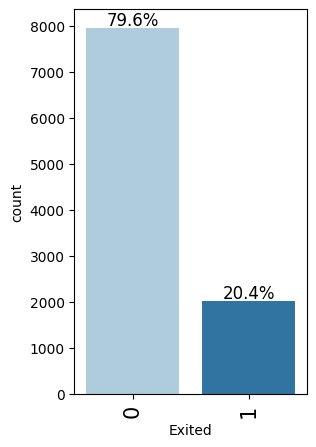

In [ ]:
# Find Distribution of Target variable Exited
labeled_barplot(data,'Exited',perc=True)

**Observation**
- 0=No ( Customer did not leave the bank )
- 1=Yes ( Customer left the bank )
- Target variable "Exited" has imbalanced distribution of customers who left the bank and not.
- 79.6% of customers are still working with bank and 20.4% of customers left the bank.

**Surname**

<ipython-input-19-c4024b896aa3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


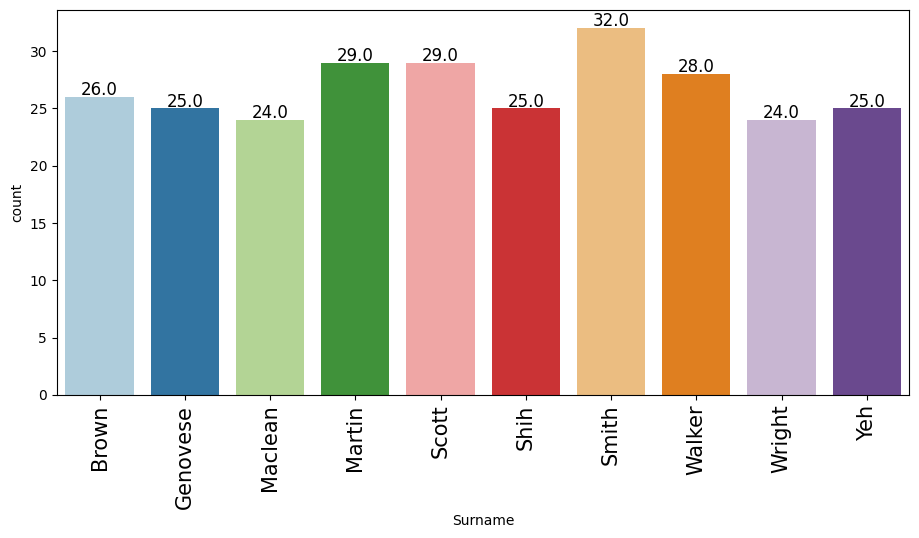

In [ ]:
#Observing Surname
labeled_barplot(data,'Surname',n=10)

**Observations**
- Top 10 surnames are Brown,Genovese,Maclean,Martin,Scott,Shih,Smith,Walker,Write and Yeh.
- Smith has highest count (32).

**CreditScore**

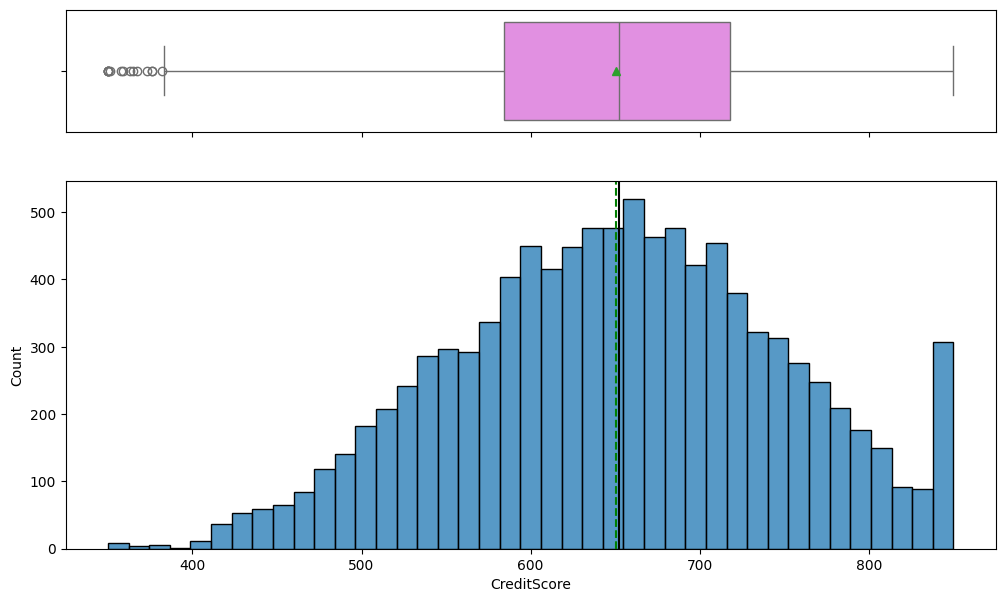

In [ ]:
# Observing Creditscore
histogram_boxplot(data,'CreditScore')

**Observations**
- CreditScore data is uniformly distributed  but it has outliers on right side with slightly skewness towards left.
- Average value(650) is slightly less than its median(652) which is considerable.

**Geography**

<ipython-input-19-c4024b896aa3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


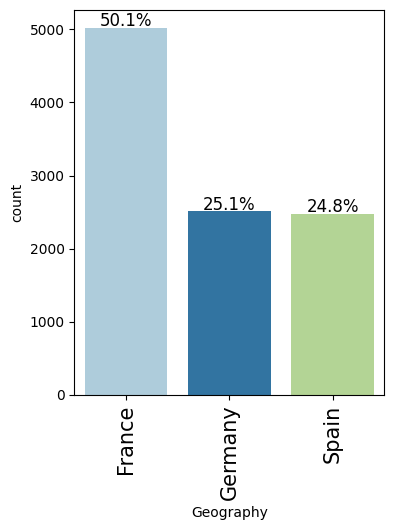

In [ ]:
# Observing Geography
labeled_barplot(data,'Geography',perc=True)

**Observations**
-  Geography has three unique values,"France","Germany" and "Spain".
- 50% of customers are from France and Customer from Germany and Spain are equally distributed.

**Age**

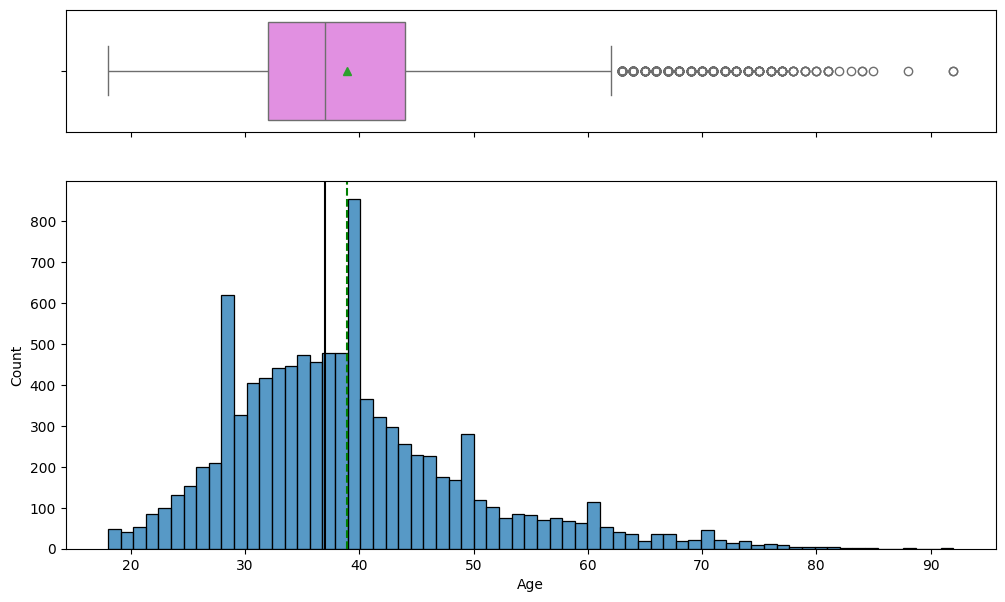

In [ ]:
#observing Age
histogram_boxplot(data,'Age')

**Observations**
- Age is right skewed with outliers on left side.
- A most of the customers having age 30 to 50yrs.
- Average age is 39ys and median is 37yrs which is acceptable.

**Tenure**

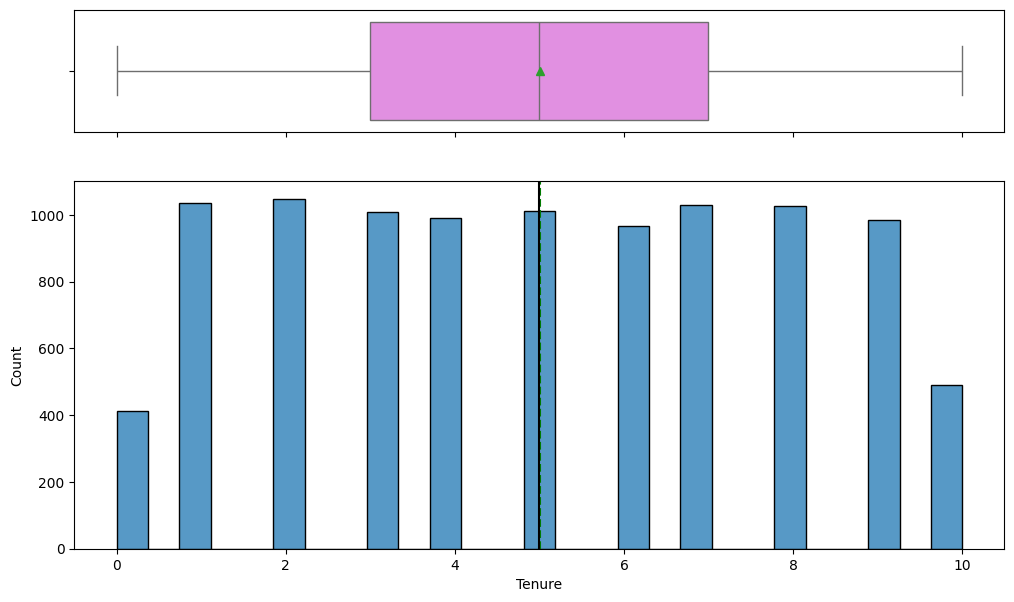

In [ ]:
#Observing Tenure
histogram_boxplot(data,'Tenure')

<ipython-input-19-c4024b896aa3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


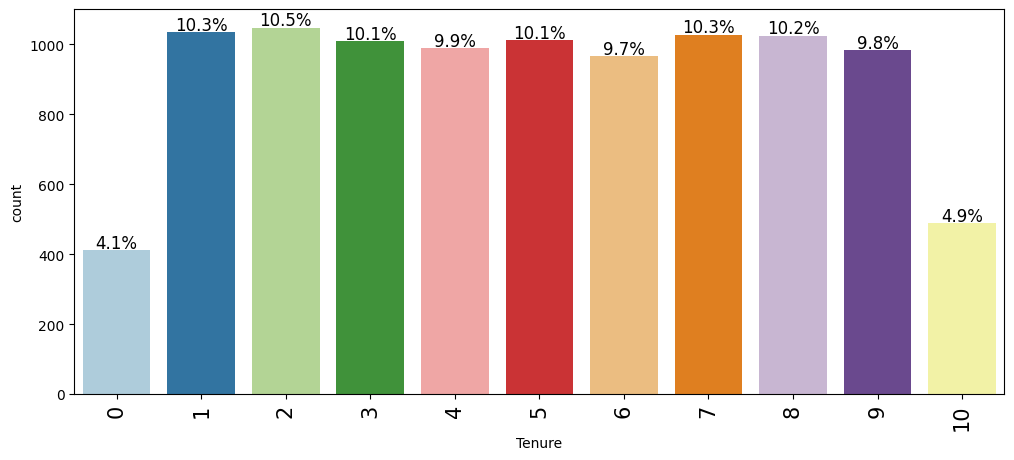

In [ ]:
labeled_barplot(data,'Tenure',perc=True)

**Observations**
- Tenure is uniformly distributed.
- Most of the customers are with bank for 1 yr to 9 yrs.
- Approximately 5% customers are with bank for 10yrs and no more.

**Balance**

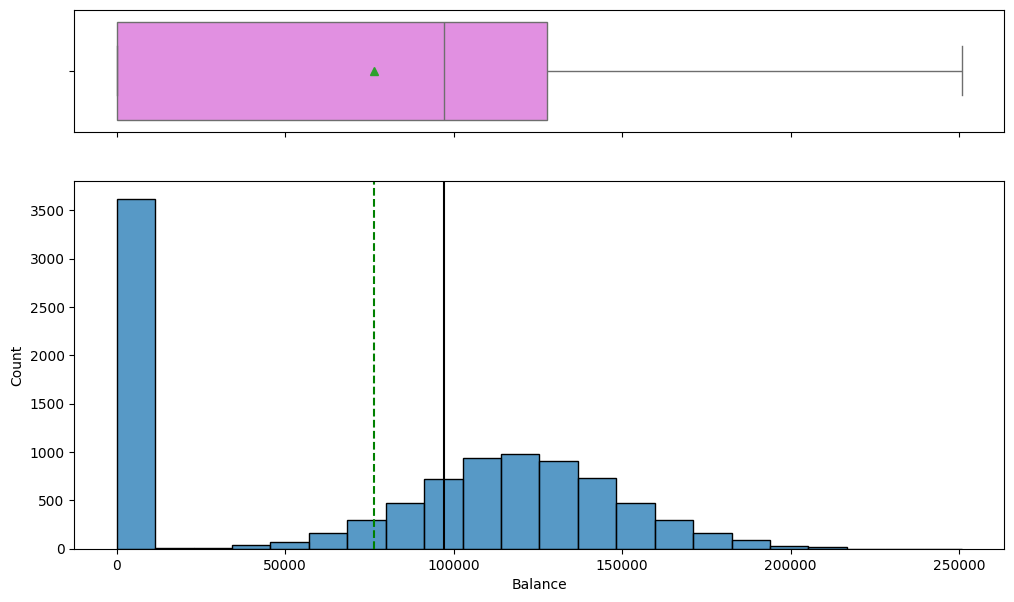

In [ ]:
#Observing Balance
histogram_boxplot(data,'Balance')

**Observations**
- The mean (76485.889288) is less than the median (97198.54), indicating a potential left skew in the distribution of account balances.
- This shows that the minimum account balance in your dataset is 0.

**NumOfProducts**

<ipython-input-19-c4024b896aa3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


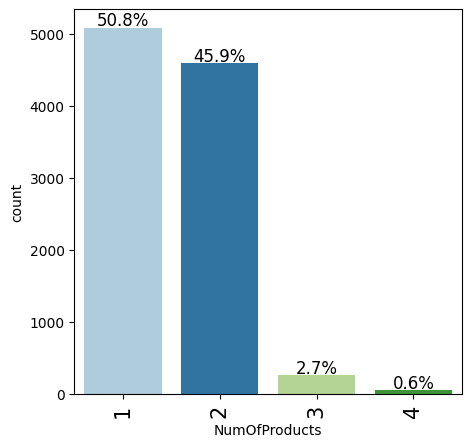

In [ ]:
# Observing NumOfProducts
labeled_barplot(data,'NumOfProducts',perc=True)

**Observarions**
- 50.8% of the customers have only one product.
- 45.9% of the customers have two products.
- Few customers have 3(2.7%) and 4 products(0.6%)

**HasCrCard**

<ipython-input-19-c4024b896aa3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


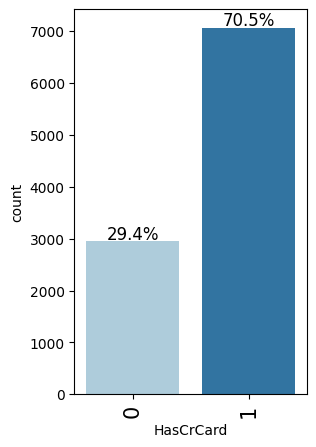

In [ ]:
#Observing HasCrCard
labeled_barplot(data,'HasCrCard',perc=True)

**Observarions**
- 70.5% Customers has credit card.
- 29.4% Customers has no credit card.

**IsActiveMember**

<ipython-input-19-c4024b896aa3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


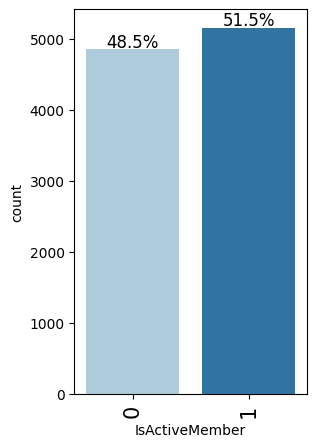

In [ ]:
# Observing IsActiveMember
labeled_barplot(data,'IsActiveMember',perc=True)

**Observarions**
- 51.5% customers are active members where as 48.5% are non active members which are nearly equally distributed.


**EstimatedSalary**

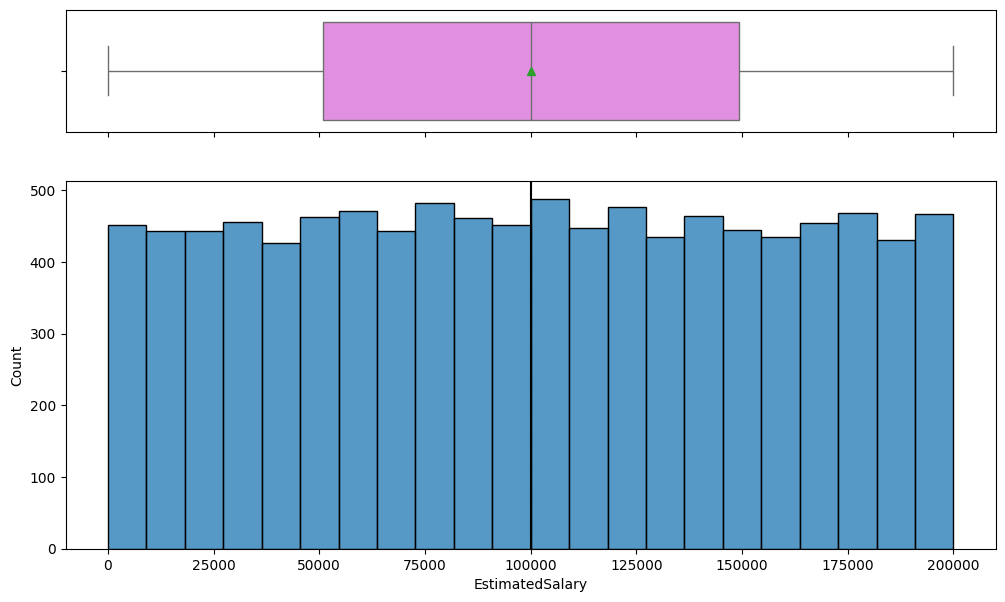

In [ ]:
# Observing Estimated Salary
histogram_boxplot(data,'EstimatedSalary')

**Observarions**
- EstimatedSalary is evenly distributed between 0 to 200K.

### Bivariate Analysis

**Age and Existed**

<ipython-input-16-3732c5f6b024>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-16-3732c5f6b024>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


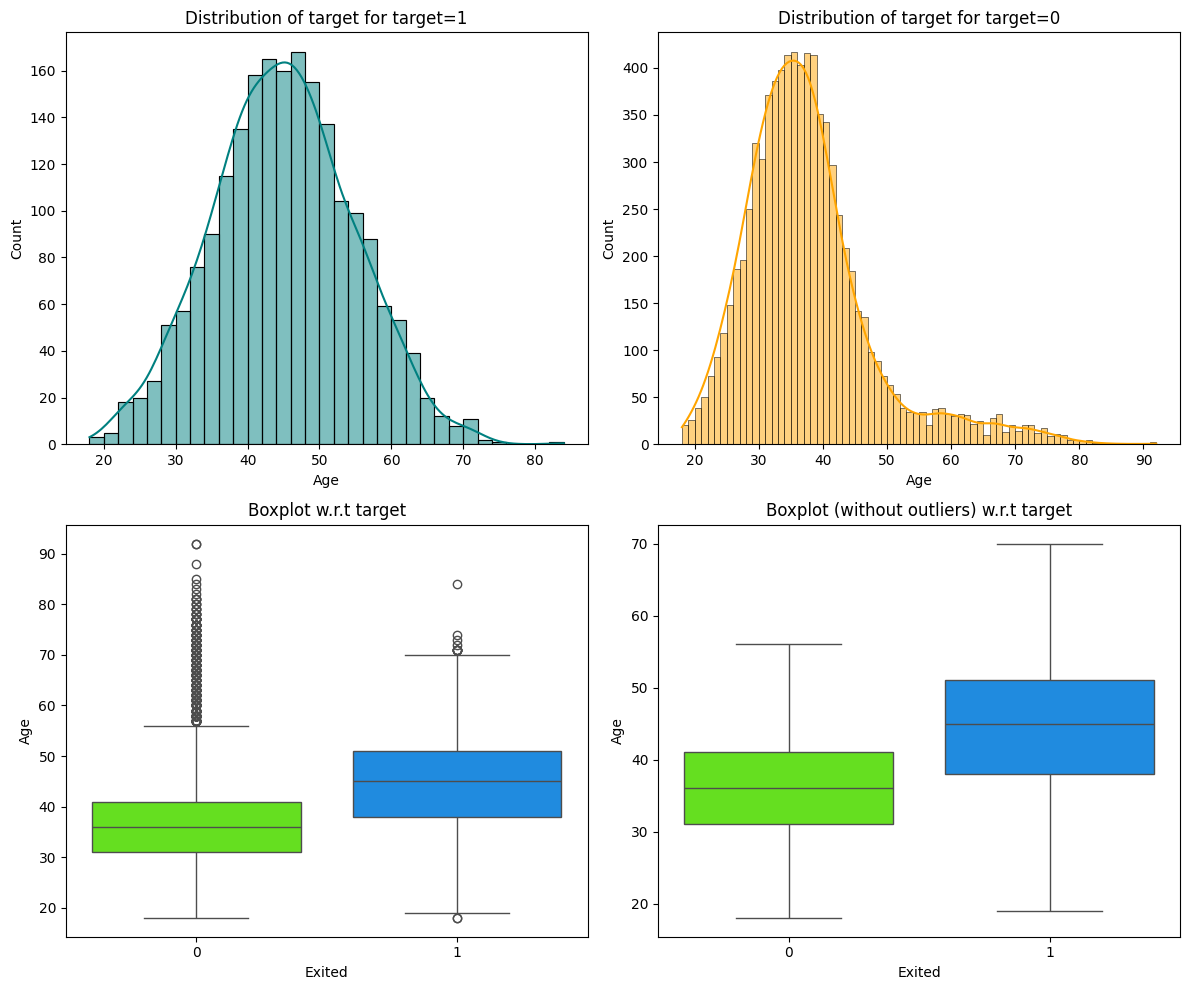

In [ ]:
# Observating Age and Existed
distribution_plot_wrt_target(data,'Age','Exited')

**Observations**
-Age is evenly distributed with respect to target varible,but Not Exited has more outliers than Exited.
- Observed the median age of customers who have exited is about 45, whereas the median age of customers who have not exited is about 35.
- Observed the max age of customers who have exited is much greated than the max age of customers who have not exited if outliers are ignored.

**CreditScore And Exited**

<ipython-input-16-3732c5f6b024>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-16-3732c5f6b024>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


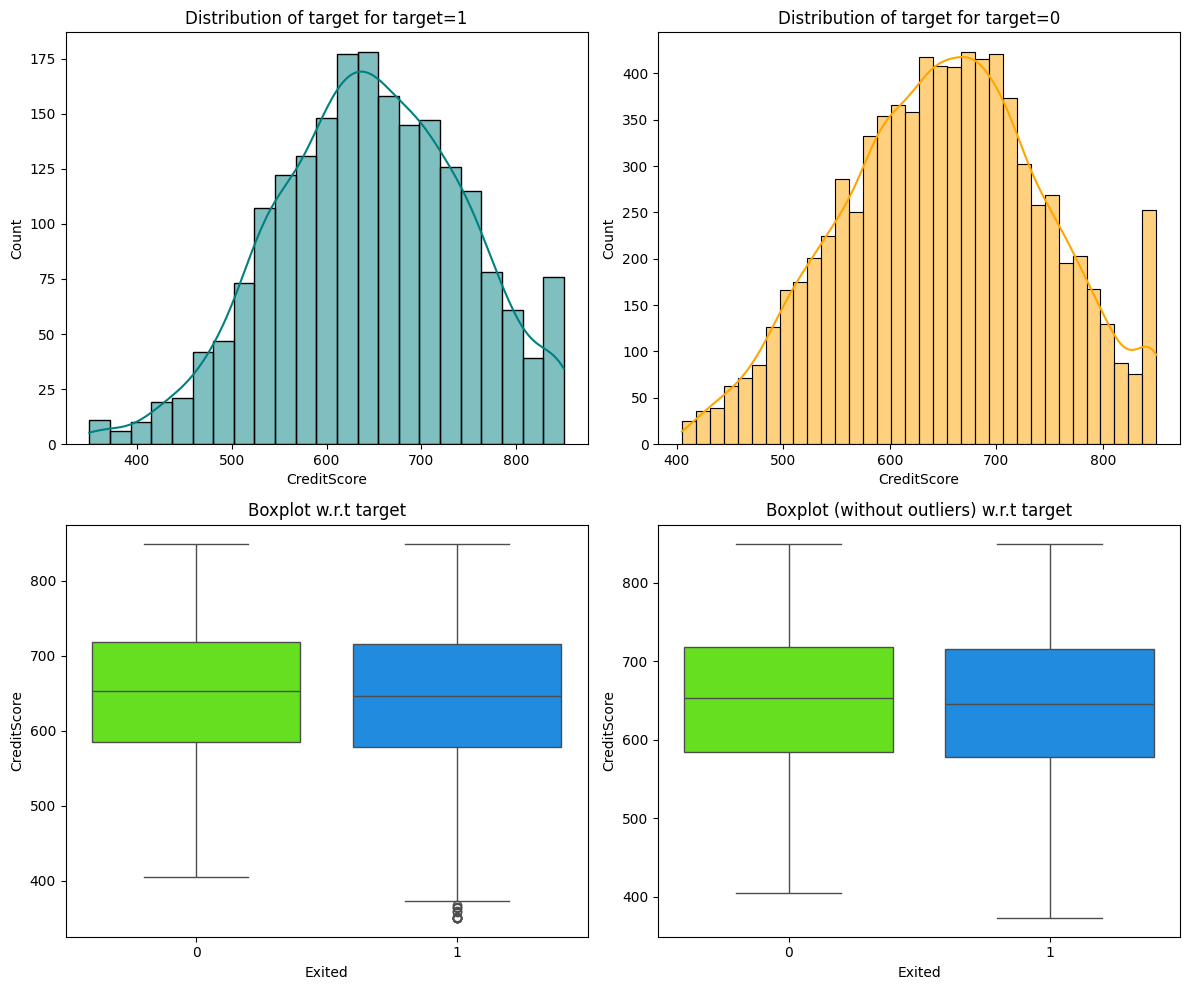

In [ ]:
#Observing distribution of Creditscore and Exited
distribution_plot_wrt_target(data,'CreditScore','Exited')

**Observations**
- CreditScore is evenly distributed with respect to Exited.Exited with few outliers.
- CreditScore is in the range of 400 to 900 for not exited and 200 to 900 for Exited.
- Median is almost same for both exited and not exited customers,it's approximately 650.
- The minimum CreditScore of customers who have exited is lower than the min CreditScore of customers who have not exited.


**Geography And Exited**

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


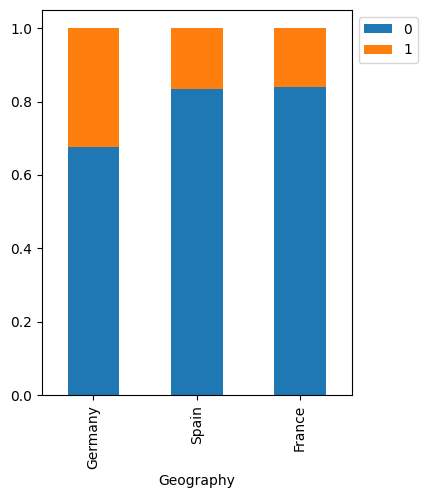

In [ ]:
#Distribution of Geography with respect to Exited
stacked_barplot(data,'Geography','Exited')

**Observations**
- Germany has more Exited customer than other two.Spain and Franse has evenly distribution for both Exited and not exited customers.


**Gender And Exited**

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


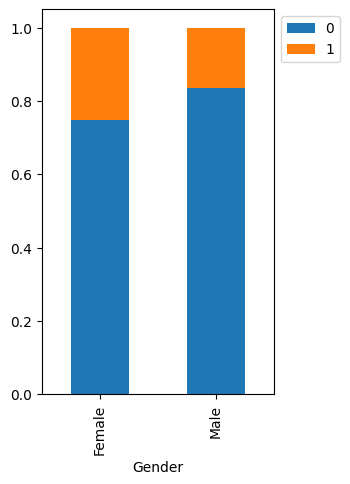

In [ ]:
#Distribution of Gender and Exited
stacked_barplot(data,'Gender','Exited')

**Observations**
- Observed slightly more females have exited than men.
- Although more females have exited, the number of men who have exited is similar.

**Tenure And Exited**

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
9        771   213    984
3        796   213   1009
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


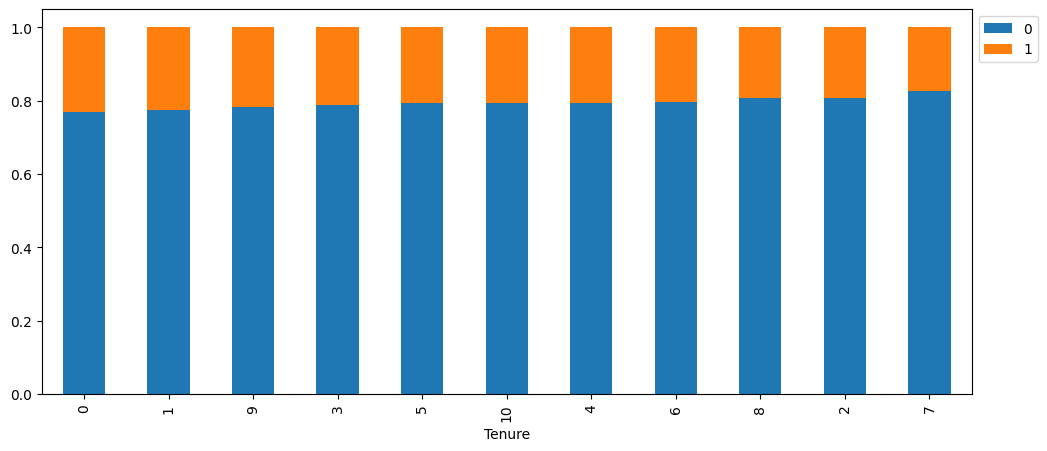

In [ ]:
#distribution of Exited and Tenure
stacked_barplot(data,'Tenure','Exited')

**Observations**
- Mostly distribution ratio of exited and not exited is similar for tenure categories.

**NumOfProducts And Exited**

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


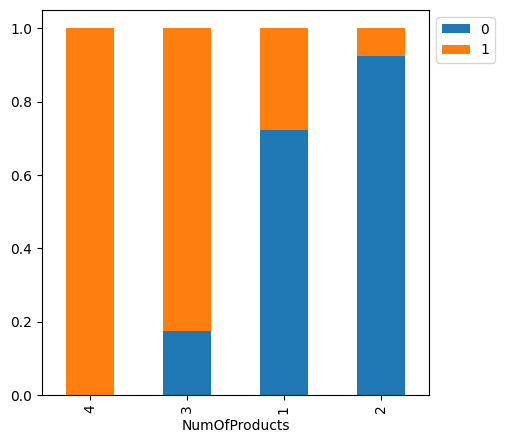

In [ ]:
#Distribution of NumProducts and Exited
stacked_barplot(data,'NumOfProducts','Exited')

**Observations**
- Distribution ratio of Exited and Not Exited is different for all types of products.
- All customers with product number 4 are exited.
- Maximum number of customers with product 3 have exited.
- Customer with two products are not exited in large amount as compared to only one product.

**Balance And Exited**

<ipython-input-16-3732c5f6b024>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-16-3732c5f6b024>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


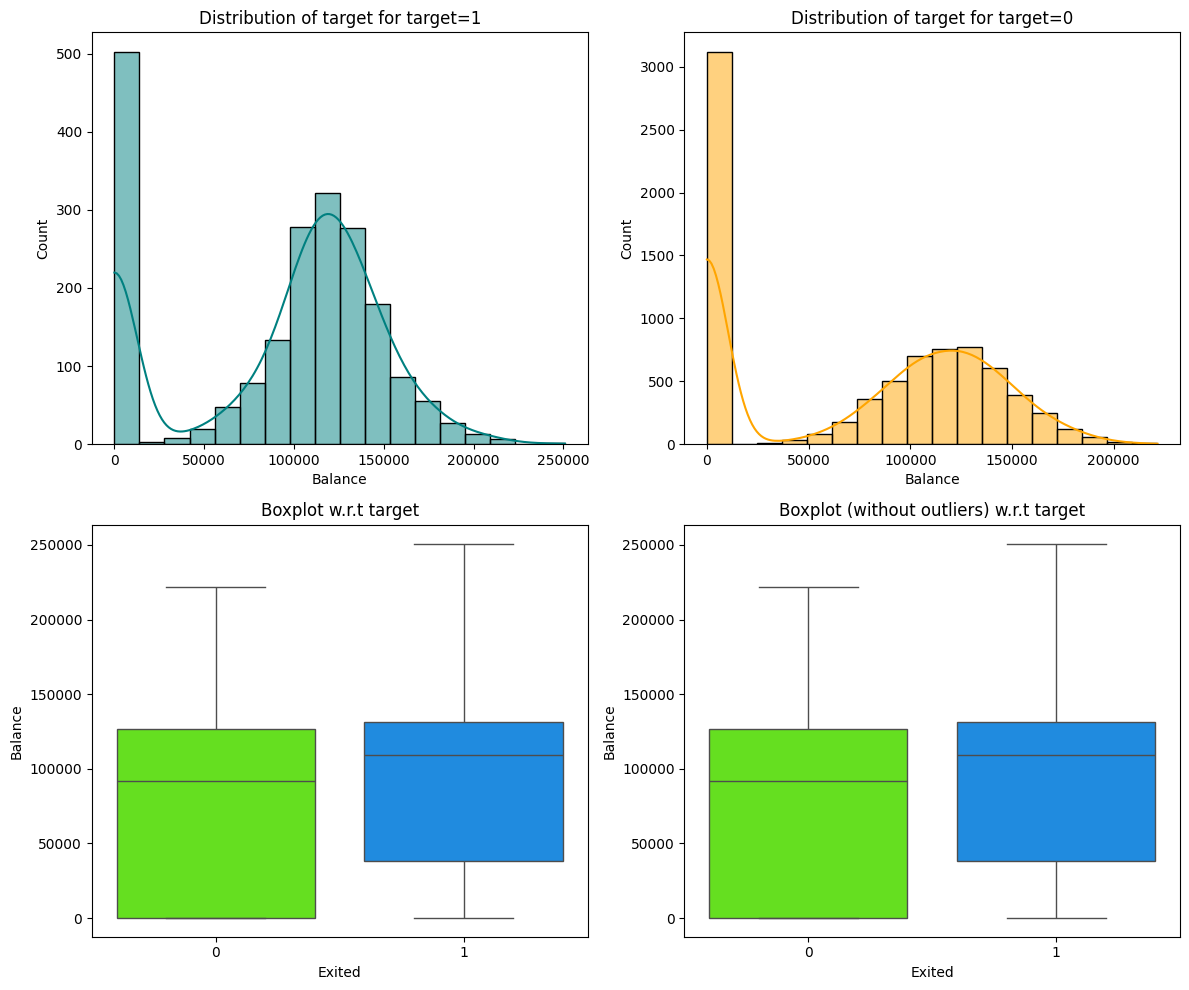

In [ ]:
#distribution of Balance and Exited
distribution_plot_wrt_target(data,'Balance','Exited')

**Observations**
- Both exited and not exited customers are negatively skewed w.r.t. balance.
- Not exited customer has mimimum balance of 0.
- Median of less than 100k for not Exited and more than 100k for Exited.
- Balance range for exited customer is higher than not exited.



**HasCrCard And Exited**

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


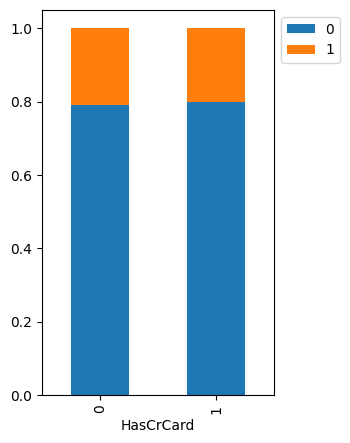

In [ ]:
# Distribution of HasCrCard and Exited
stacked_barplot(data,'HasCrCard','Exited')

**Observations**
- Distribution Ratio of Exited and Not Exited Customers with respect to hasCrcard is same.

**EstimatedSalary and Exited**

<ipython-input-16-3732c5f6b024>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-16-3732c5f6b024>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


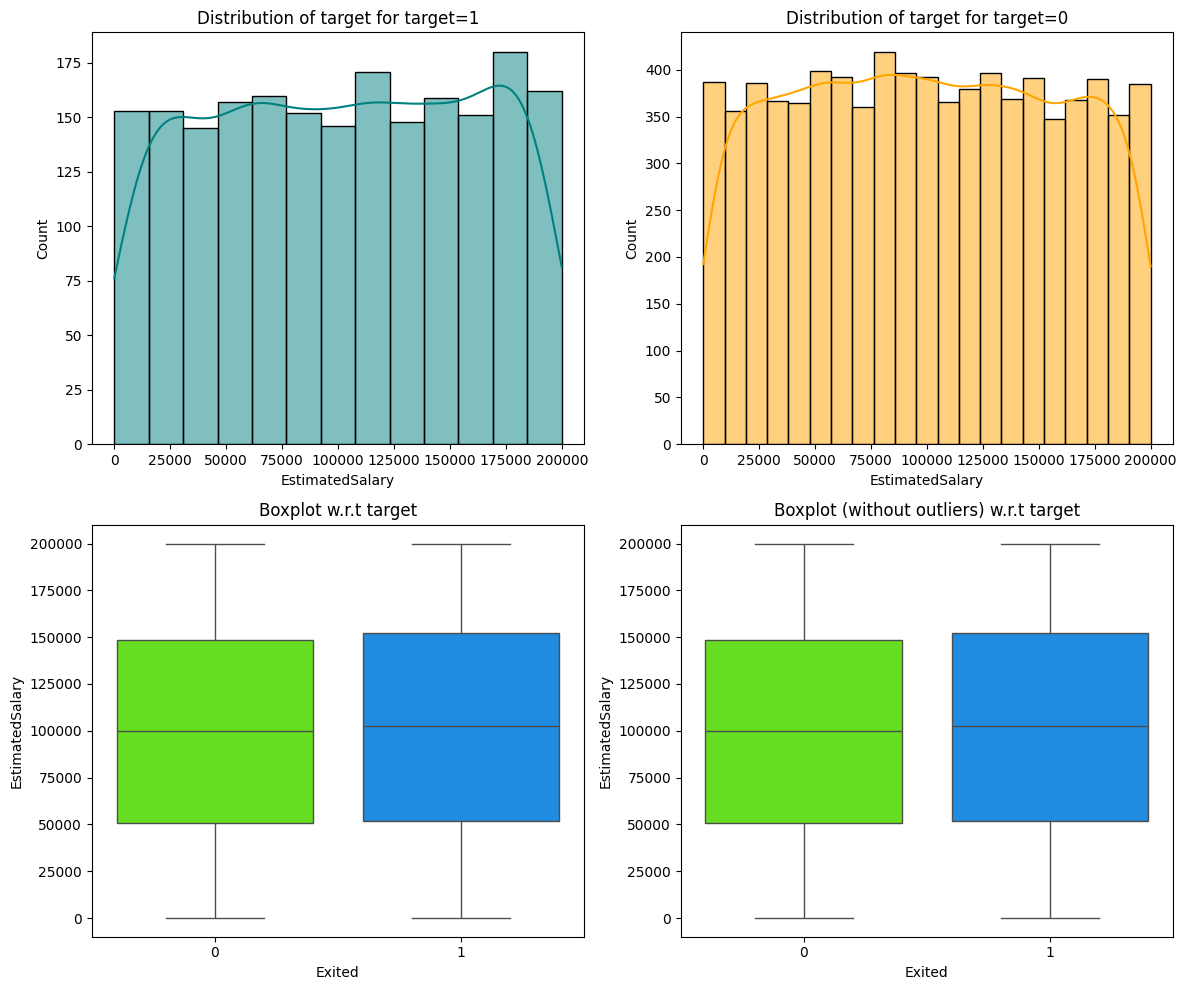

In [ ]:
#Distribution of EstimatedSalary and Exited
distribution_plot_wrt_target(data,'EstimatedSalary','Exited')

**Observations**
- Distrubution of exited and not exited customers with respect to EstimatedSalary is same.
- Both have  median EstimatedSalary is 100K and in between range is 0 to 200K.

**isActiveMember And Exited**

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


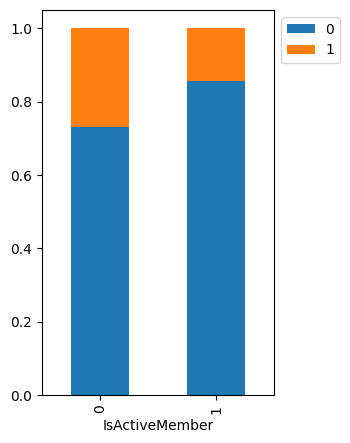

In [ ]:
#Distribution of isActiveMember and Exited
stacked_barplot(data,'IsActiveMember','Exited')

**OBervations**
- Distribution ratio of Exited and Not exited for not active members is more than active members.

**Multivariate Analysis**

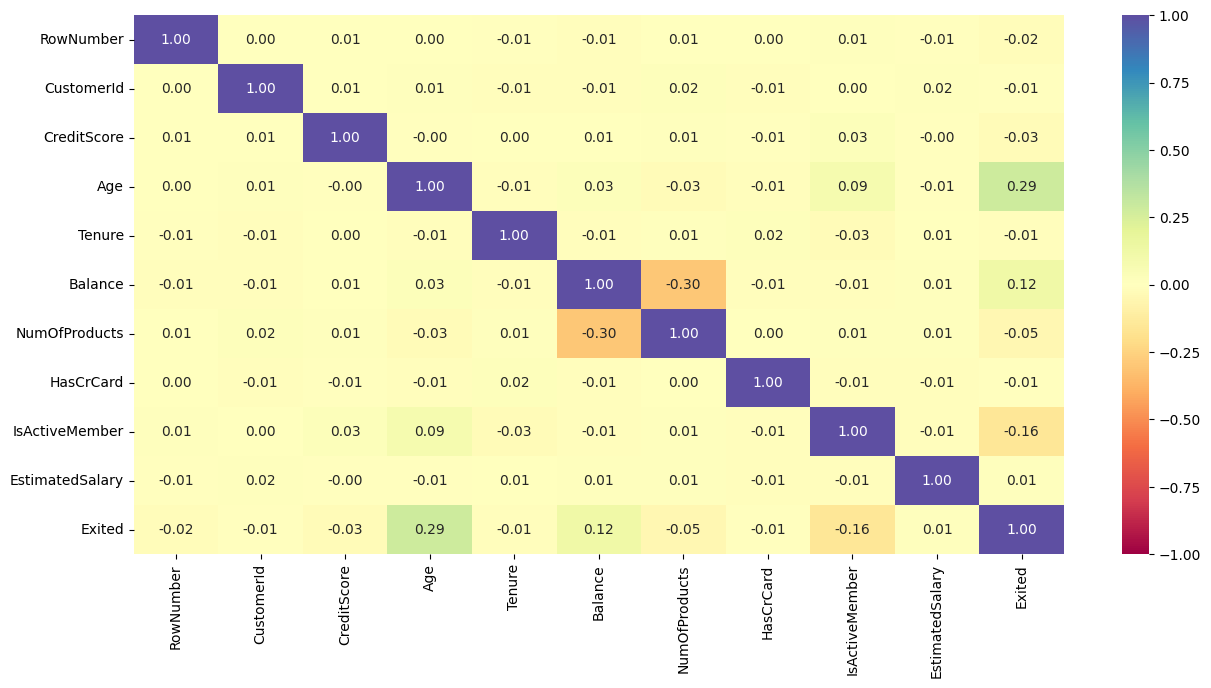

In [ ]:
# Created a correlation matrix to show any correlations between non-categorical columns.
# Values of 1 are highly positively correlated, values of -1 are highly negatively correlated.
plt.figure(figsize=(15, 7))
# Selecting only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**
- No significant correlation exists between variables.
- There is some slight positive correlation between Age and Exited.
- There is some slight negative correlation between Balance and NumOfProducts.

## Data Preprocessing

### Train-validation-test Split

- Split data into training, validation, and test sets.
- Models will be trained on training data, and evaluated on validation data.
- The best models will be tuned and finally evaluated on the test data.

In [21]:
# Creating the independent variable data frame.
X = data.drop(['Exited','Surname','RowNumber','CustomerId'], axis=1)
#Convert Object types to category
X['Geography']=X['Geography'].astype('category')
X['Gender']=X['Gender'].astype('category')

# Creating the dependent variable data frame.
y = data[['Exited']]

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
dtypes: category(2), float64(2), int64(6)
memory usage: 644.9 KB


In [23]:
# Splitting data into training and temp data frames.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
# Splitting temp data frame into validation and test data frames.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=1)

In [25]:
#Checking the shape of train,test and val data
X_train.shape, X_val.shape, X_test.shape

((7000, 10), (1800, 10), (1200, 10))

In [26]:
X_train.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
2228          644    France  Female   37       8       0.00              2   
5910          481    France  Female   39       6       0.00              1   
1950          680    France  Female   37      10  123806.28              1   
2119          690    France    Male   29       5       0.00              2   
5947          656    France  Female   45       7  145933.27              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
2228          1               0         20968.88  
5910          1               1         24677.54  
1950          1               0         81776.84  
2119          1               0        108577.97  
5947          1               1        199392.14

In [27]:
# Printing the size of the Training, Validation, and Test data frames.
print("-"*40)
print("Shape of Training Set : ", X_train.shape)
print("Shape of Validation Set", X_val.shape)
print("Shape of Test Set : ", X_test.shape)
print("-"*40)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("-"*40)
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("-"*40)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
print("-"*40)

----------------------------------------
Shape of Training Set :  (7000, 10)
Shape of Validation Set (1800, 10)
Shape of Test Set :  (1200, 10)
----------------------------------------
Percentage of classes in training set:
Exited
0         0.798571
1         0.201429
Name: proportion, dtype: float64
----------------------------------------
Percentage of classes in validation set:
Exited
0         0.790556
1         0.209444
Name: proportion, dtype: float64
----------------------------------------
Percentage of classes in test set:
Exited
0         0.791667
1         0.208333
Name: proportion, dtype: float64
----------------------------------------


- There is imbalance in Target variable distribution.

### Dummy Variable Creation

In [28]:
# Encoding categorical variables for use in models.
# Dropping first of each encoded column to reduce data frame size.
#categorical columns
cat_cols = ['Geography','Gender']
# Encoding X_train data frame categorical columns.
X_train = pd.get_dummies(X_train,columns=cat_cols,drop_first=True,dtype='uint8')
# Encoding X_val data frame categorical columns.
X_val = pd.get_dummies(X_val,columns=cat_cols,drop_first=True,dtype='uint8')
# Encoding X_test data frame categorical columns.
X_test = pd.get_dummies(X_test,columns=cat_cols,drop_first=True,dtype='uint8')

In [29]:
# Printing shape of new data frames.
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (7000, 11)
Shape of X_val: (1800, 11)
Shape of X_test: (1200, 11)


In [30]:
# Printing shape of new data frames.
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of y_train: (7000, 1)
Shape of y_val: (1800, 1)
Shape of y_test: (1200, 1)


In [31]:
# Checking information of new data frame's columns.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 2228 to 235
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        7000 non-null   int64  
 1   Age                7000 non-null   int64  
 2   Tenure             7000 non-null   int64  
 3   Balance            7000 non-null   float64
 4   NumOfProducts      7000 non-null   int64  
 5   HasCrCard          7000 non-null   int64  
 6   IsActiveMember     7000 non-null   int64  
 7   EstimatedSalary    7000 non-null   float64
 8   Geography_Germany  7000 non-null   uint8  
 9   Geography_Spain    7000 non-null   uint8  
 10  Gender_Male        7000 non-null   uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 512.7 KB


In [32]:
# Checking information of new data frame's columns.
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1800 entries, 8043 to 2247
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        1800 non-null   int64  
 1   Age                1800 non-null   int64  
 2   Tenure             1800 non-null   int64  
 3   Balance            1800 non-null   float64
 4   NumOfProducts      1800 non-null   int64  
 5   HasCrCard          1800 non-null   int64  
 6   IsActiveMember     1800 non-null   int64  
 7   EstimatedSalary    1800 non-null   float64
 8   Geography_Germany  1800 non-null   uint8  
 9   Geography_Spain    1800 non-null   uint8  
 10  Gender_Male        1800 non-null   uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 131.8 KB


In [33]:
# Checking information of new data frame's columns.
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 5309 to 9000
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        1200 non-null   int64  
 1   Age                1200 non-null   int64  
 2   Tenure             1200 non-null   int64  
 3   Balance            1200 non-null   float64
 4   NumOfProducts      1200 non-null   int64  
 5   HasCrCard          1200 non-null   int64  
 6   IsActiveMember     1200 non-null   int64  
 7   EstimatedSalary    1200 non-null   float64
 8   Geography_Germany  1200 non-null   uint8  
 9   Geography_Spain    1200 non-null   uint8  
 10  Gender_Male        1200 non-null   uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 87.9 KB


### Data Normalization

In [34]:
# Scaling numerical data of independent variables using StandardScaler()
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

- Model can make wrong predictions as:

 - Predicting a customer is exiting and the customer is not exiting (False Positive - FP)
 - Predicting a customer is not exiting and customer is exiting (False Negative - FN)
- Which case is more important?

  - False Negatives (FN) are worse - predicting that customer is not exiting but he/she is exiting.
 - It might cause loss to the bank because the bank will not offer these misidentified customers any initiative to retain their business.
- How to reduce this loss i.e need to reduce False Negative?
  - Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing FN.
  -  Hence, the focus should be on increasing Recall or minimizing the FN or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.


**Utility Functions**

In [35]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [36]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

As we have are dealing with an imbalance in class distribution, we will be using class weights to allow the model to give proportionally more importance to the minority class.

In [37]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train['Exited'].astype(int)) # Extract values from the 'Exited' column and convert them to integers

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2522361359570662, 1: 4.964539007092198}

### Neural Network with SGD Optimizer

**Model 0**

Let's start with a neural network consisting of
- two hidden layers with 32 and 64 neurons respectively
- activation function of ReLU.
- SGD as the optimizer

In [38]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [39]:
#Initializing the neural network
model = Sequential()
model.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
X_train.shape[0]

7000

In [42]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [43]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=100,class_weight=cw_dict, verbose=2,batch_size = X_train.shape[0])
end=time.time()

Epoch 1/100
1/1 - 1s - 1s/step - accuracy: 0.3911 - loss: 1.3627 - val_accuracy: 0.4139 - val_loss: 0.7444
Epoch 2/100
1/1 - 0s - 266ms/step - accuracy: 0.4011 - loss: 1.3595 - val_accuracy: 0.4283 - val_loss: 0.7394
Epoch 3/100
1/1 - 0s - 167ms/step - accuracy: 0.4117 - loss: 1.3565 - val_accuracy: 0.4383 - val_loss: 0.7345
Epoch 4/100
1/1 - 0s - 150ms/step - accuracy: 0.4243 - loss: 1.3536 - val_accuracy: 0.4517 - val_loss: 0.7299
Epoch 5/100
1/1 - 0s - 293ms/step - accuracy: 0.4371 - loss: 1.3508 - val_accuracy: 0.4583 - val_loss: 0.7255
Epoch 6/100
1/1 - 0s - 129ms/step - accuracy: 0.4477 - loss: 1.3483 - val_accuracy: 0.4650 - val_loss: 0.7213
Epoch 7/100
1/1 - 0s - 92ms/step - accuracy: 0.4570 - loss: 1.3458 - val_accuracy: 0.4789 - val_loss: 0.7173
Epoch 8/100
1/1 - 0s - 91ms/step - accuracy: 0.4680 - loss: 1.3434 - val_accuracy: 0.4928 - val_loss: 0.7134
Epoch 9/100
1/1 - 0s - 114ms/step - accuracy: 0.4786 - loss: 1.3412 - val_accuracy: 0.4994 - val_loss: 0.7097
Epoch 10/100
1/

In [355]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization","train loss","validation loss","train accuracy","validation accuracy","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

In [356]:
results.loc[0] = [2,[64,32],['relu','relu'],100,7000,"sgd",['-', "-"],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                2                 [64, 32]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                        [relu, relu]       100        7000       sgd   

  learning rate, momentum weight initializer regularization  train loss  \
0                  [-, -]             xavier              -    1.251845   

   validation loss  train accuracy  validation accuracy  time (secs)  
0         0.608909        0.724714             0.726667     -7129.34

**Plotting Accuracy vs Epoch Curve**

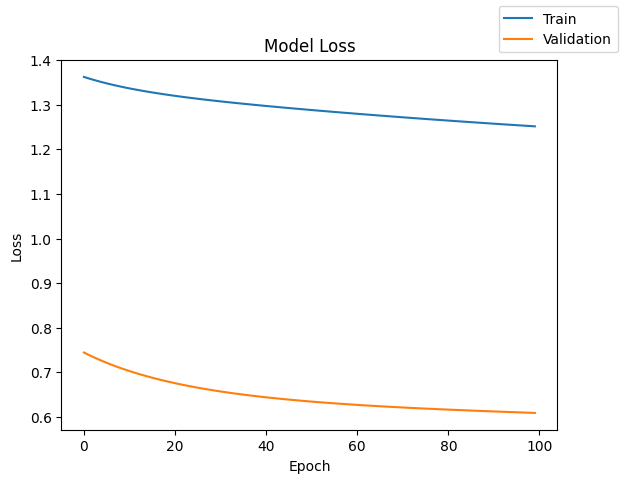

In [46]:
plot(history,'loss')

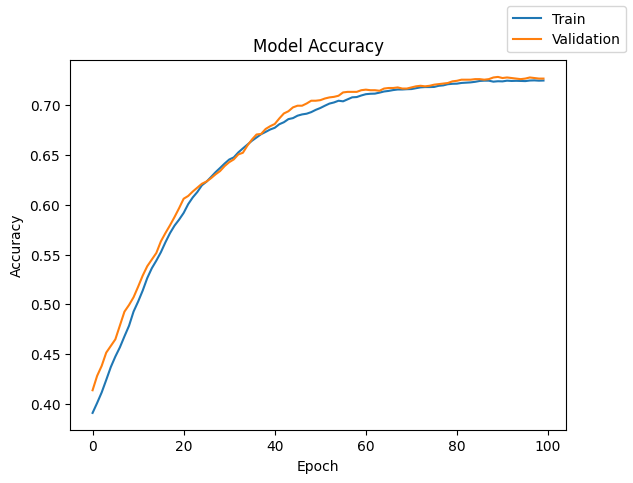

In [47]:
plot(history,'accuracy')

In [48]:
#observing model performance training data
model_performance_classification(model, X_train, y_train)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.725429  0.725429   0.789954  0.746624

In [49]:
#Model performance for validation data
model_performance_classification(model, X_val, y_val)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.726667  0.726667   0.792148  0.747172

**Observations**
- The training and validation accuracy increases as epoch increases.
- The validation accuracy is constant between ~80 to 100 epochs.
- The model is not giving good accuracy. At 100 epochs, the accuracy of the model on the training data is about 72.5% and the validation accuracy is 72.6%.
- The validation accuracy is closer to the training accuracy. This indicates that the model is giving a generalized performance.
- Training loss is more than validation loss that mean the model is making more mistakes during training.
- Generally, having a lower validation loss than training loss is a good sign. It suggests your model isn't overfitting and generalizes well.
- Recall for both training and validation is almost same.But we need to improve it.
- In General  model is not performing  well.

**Model 1**
- **2. Checking with Reducing batch size to 64**

In [50]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [51]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model_1.add(Dense(32,activation="relu"))
model_1.add(Dense(1,activation="sigmoid"))

In [52]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model_1.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [54]:
start = time.time()
history_1 = model_1.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=100,class_weight=cw_dict, verbose=2,batch_size =64)
end=time.time()

Epoch 1/100
110/110 - 2s - 14ms/step - accuracy: 0.5029 - loss: 1.3373 - val_accuracy: 0.6639 - val_loss: 0.6474
Epoch 2/100
110/110 - 1s - 5ms/step - accuracy: 0.6991 - loss: 1.2368 - val_accuracy: 0.7189 - val_loss: 0.6076
Epoch 3/100
110/110 - 1s - 5ms/step - accuracy: 0.7219 - loss: 1.1885 - val_accuracy: 0.7322 - val_loss: 0.5805
Epoch 4/100
110/110 - 0s - 4ms/step - accuracy: 0.7284 - loss: 1.1635 - val_accuracy: 0.7089 - val_loss: 0.5910
Epoch 5/100
110/110 - 1s - 5ms/step - accuracy: 0.7174 - loss: 1.1513 - val_accuracy: 0.7444 - val_loss: 0.5426
Epoch 6/100
110/110 - 1s - 5ms/step - accuracy: 0.7233 - loss: 1.1413 - val_accuracy: 0.7306 - val_loss: 0.5561
Epoch 7/100
110/110 - 0s - 3ms/step - accuracy: 0.7184 - loss: 1.1340 - val_accuracy: 0.7467 - val_loss: 0.5316
Epoch 8/100
110/110 - 1s - 5ms/step - accuracy: 0.7193 - loss: 1.1271 - val_accuracy: 0.7344 - val_loss: 0.5400
Epoch 9/100
110/110 - 0s - 3ms/step - accuracy: 0.7187 - loss: 1.1208 - val_accuracy: 0.7300 - val_loss

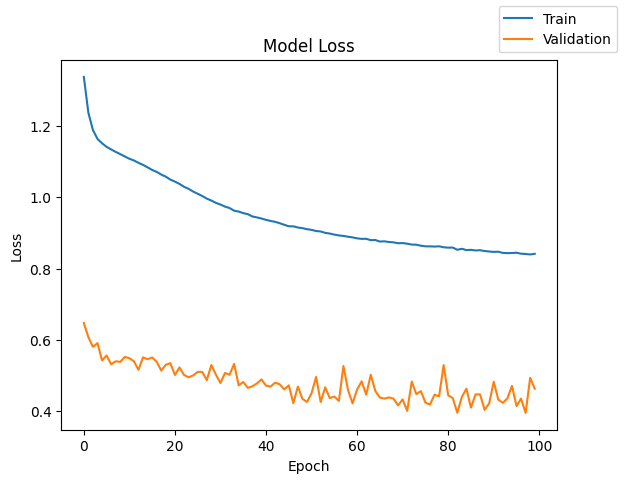

In [55]:
#Plotting loss vs epoch
plot(history_1,'loss')

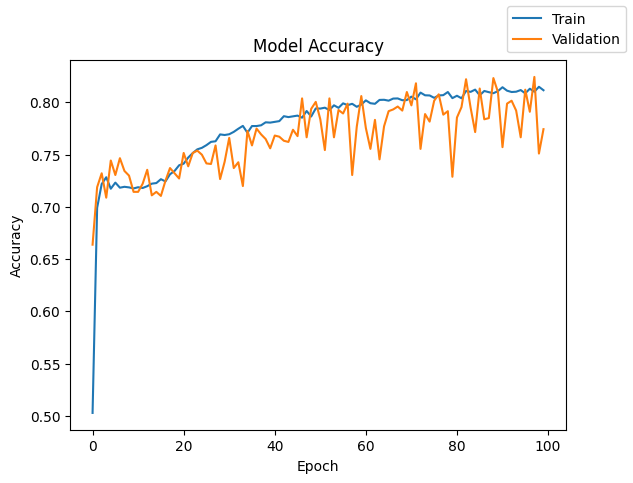

In [56]:
#Plotting Accuracy curve
plot(history_1,'accuracy')

In [357]:
results.loc[1] = [2,[64,32],['relu','relu'],100,64,"sgd",['-', "-"],"xavier","-",history_1.history["loss"][-1],history_1.history["val_loss"][-1],history_1.history["accuracy"][-1],history_1.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                2                 [64, 32]   
1                2                 [64, 32]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                        [relu, relu]       100        7000       sgd   
1                        [relu, relu]       100          64       sgd   

  learning rate, momentum weight initializer regularization  train loss  \
0                  [-, -]             xavier              -    1.251845   
1                  [-, -]             xavier              -    0.841307   

   validation loss  train accuracy  validation accuracy  time (secs)  
0         0.608909        0.724714             0.726667     -7129.34  
1         0.463114        0.811714             0.774444     -7129.34

In [58]:
#observing model performance training data
model_performance_classification(model_1, X_train, y_train)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.807429  0.807429    0.85745  0.821435

In [59]:
#Model performance for validation dataset
model_performance_classification(model_1, X_val, y_val)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.774444  0.774444    0.83196   0.79089

**Observations**
- By reducing the batch size,training and validation loss has reduced from 125% to 84% and 60%  to 46% ,respectively and increased accuracy for both training and validation from 72% to 81% and 72.7% to 77% resp.which is improvement in model performance.
- But there are fluctuations in accuracy and loss which is indication of noise which is not good sign of good model.

**Model 2**
- **3. Reducing hidden layer:**
   - hidden layer with 64 neurons and 'relu' activation function

In [60]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [61]:
#defining model with new parameters
model2 = Sequential()
model2.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model2.add(Dense(1,activation="sigmoid"))

In [62]:
#model summary
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
#compiling model
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model2.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [64]:
#training model
start = time.time()
history2 = model2.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=100,class_weight=cw_dict, verbose=2,batch_size = 64)
end=time.time()

Epoch 1/100
110/110 - 2s - 21ms/step - accuracy: 0.7231 - loss: 1.2787 - val_accuracy: 0.6933 - val_loss: 0.6048
Epoch 2/100
110/110 - 1s - 10ms/step - accuracy: 0.7034 - loss: 1.2049 - val_accuracy: 0.6978 - val_loss: 0.5937
Epoch 3/100
110/110 - 1s - 5ms/step - accuracy: 0.7111 - loss: 1.1787 - val_accuracy: 0.7050 - val_loss: 0.5838
Epoch 4/100
110/110 - 1s - 6ms/step - accuracy: 0.7100 - loss: 1.1655 - val_accuracy: 0.7167 - val_loss: 0.5648
Epoch 5/100
110/110 - 1s - 6ms/step - accuracy: 0.7131 - loss: 1.1566 - val_accuracy: 0.7250 - val_loss: 0.5499
Epoch 6/100
110/110 - 1s - 5ms/step - accuracy: 0.7194 - loss: 1.1505 - val_accuracy: 0.7139 - val_loss: 0.5666
Epoch 7/100
110/110 - 1s - 5ms/step - accuracy: 0.7121 - loss: 1.1451 - val_accuracy: 0.7289 - val_loss: 0.5472
Epoch 8/100
110/110 - 0s - 4ms/step - accuracy: 0.7164 - loss: 1.1402 - val_accuracy: 0.7111 - val_loss: 0.5662
Epoch 9/100
110/110 - 1s - 5ms/step - accuracy: 0.7133 - loss: 1.1365 - val_accuracy: 0.7211 - val_los

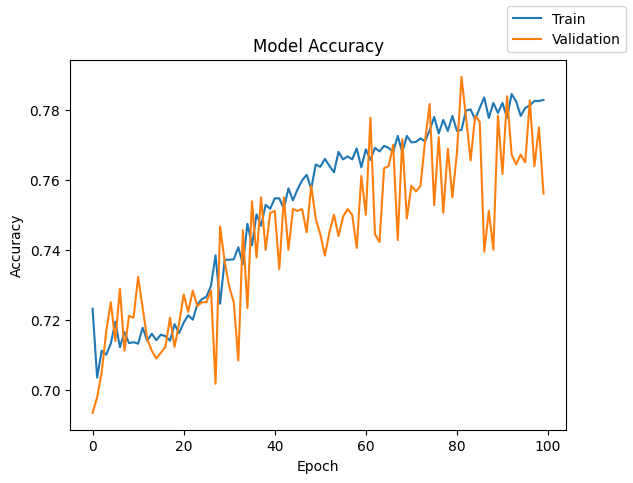

In [65]:
#plot accuracy vs epoach
plot(history2,'accuracy')

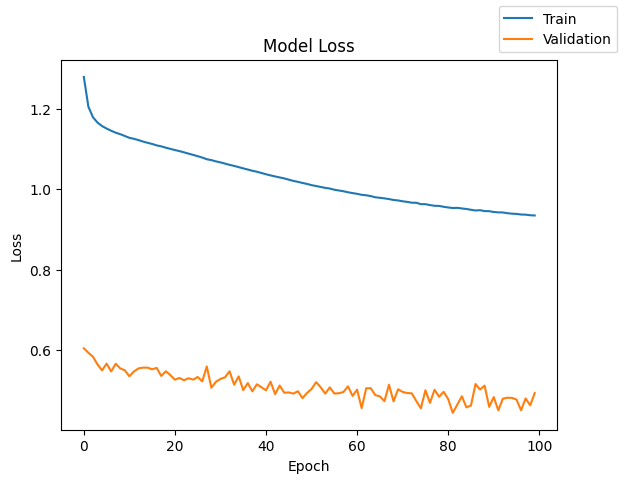

In [66]:
#plot loss vs epoch
plot(history2,'loss')

In [358]:
#defining result dataset
# results
results.loc[2] = [1,64,'relu',100,64,"sgd",['-', "-"],"xavier","-",history2.history["loss"][-1],history2.history["val_loss"][-1],history2.history["accuracy"][-1],history2.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                2                 [64, 32]   
1                2                 [64, 32]   
2                1                       64   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                        [relu, relu]       100        7000       sgd   
1                        [relu, relu]       100          64       sgd   
2                                relu       100          64       sgd   

  learning rate, momentum weight initializer regularization  train loss  \
0                  [-, -]             xavier              -    1.251845   
1                  [-, -]             xavier              -    0.841307   
2                  [-, -]             xavier              -    0.934649   

   validation loss  train accuracy  validation accuracy  time (secs)  
0         0.608909        0.724714             0.726667     -7129.34  
1         0.463114        0.811714             0.774444     -7129.34  
2         0.493455        0.782857             0.756111     -7129.34

In [68]:
#Model performance for training dataset
model_performance_classification(model2, X_train, y_train)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.767571  0.767571   0.842814  0.787406

In [69]:
#model performance for validation dataset
model_performance_classification(model2, X_val, y_val)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.756111  0.756111   0.827613  0.775518

**Observations**
- Reducing the hidden layer,training and validation accuracy reduced with increase in loss and increased osscilations in both responses.
- Lets use two hidden layers with change in one activation function and chage in epoch size.

**Model 3**


We'll start out with a baseline model having the following configuration:

- 1 input, 2 hidden, 1 output layers
- relu and tanh activations for the first and second hidden layer respectively
- Stochastic Gradient Descent (SGD)

In [70]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [71]:
#define model
model3 = Sequential()
model3.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model3.add(Dense(32,activation="tanh"))
model3.add(Dense(1,activation="sigmoid"))

In [72]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
#compile model
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model3.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [74]:
#train model
start = time.time()
history3 = model3.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=150,class_weight=cw_dict, verbose=2,batch_size = 64)

Epoch 1/150
110/110 - 2s - 16ms/step - accuracy: 0.6596 - loss: 1.3239 - val_accuracy: 0.6833 - val_loss: 0.6346
Epoch 2/150
110/110 - 0s - 4ms/step - accuracy: 0.7153 - loss: 1.2287 - val_accuracy: 0.7111 - val_loss: 0.6020
Epoch 3/150
110/110 - 1s - 5ms/step - accuracy: 0.7219 - loss: 1.1835 - val_accuracy: 0.7228 - val_loss: 0.5855
Epoch 4/150
110/110 - 1s - 6ms/step - accuracy: 0.7170 - loss: 1.1622 - val_accuracy: 0.7200 - val_loss: 0.5805
Epoch 5/150
110/110 - 1s - 5ms/step - accuracy: 0.7130 - loss: 1.1504 - val_accuracy: 0.7422 - val_loss: 0.5423
Epoch 6/150
110/110 - 0s - 3ms/step - accuracy: 0.7163 - loss: 1.1417 - val_accuracy: 0.7217 - val_loss: 0.5558
Epoch 7/150
110/110 - 1s - 5ms/step - accuracy: 0.7154 - loss: 1.1344 - val_accuracy: 0.7011 - val_loss: 0.5792
Epoch 8/150
110/110 - 0s - 3ms/step - accuracy: 0.7054 - loss: 1.1298 - val_accuracy: 0.7467 - val_loss: 0.5235
Epoch 9/150
110/110 - 1s - 5ms/step - accuracy: 0.7151 - loss: 1.1252 - val_accuracy: 0.7422 - val_loss

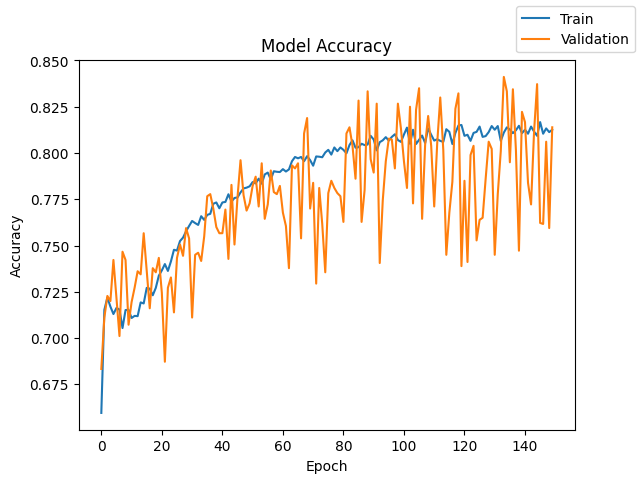

In [75]:
#Plot accuracy curve
plot(history3,'accuracy')

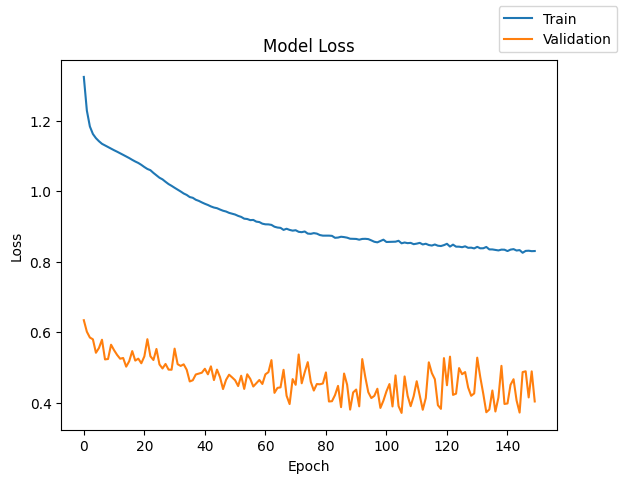

In [76]:
#plot loss curve
plot(history3,'loss')

In [359]:
#Observe all model performances
results.loc[3] = [2,[64,32],['relu','tanh'],150,64,"sgd",['-', "-"],"xavier","-",history3.history["loss"][-1],history3.history["val_loss"][-1],history3.history["accuracy"][-1],history3.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                2                 [64, 32]   
1                2                 [64, 32]   
2                1                       64   
3                2                 [64, 32]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                        [relu, relu]       100        7000       sgd   
1                        [relu, relu]       100          64       sgd   
2                                relu       100          64       sgd   
3                        [relu, tanh]       150          64       sgd   

  learning rate, momentum weight initializer regularization  train loss  \
0                  [-, -]             xavier              -    1.251845   
1                  [-, -]             xavier              -    0.841307   
2                  [-, -]             xavier              -    0.934649   
3                  [-, -]             xavier              -    0.830580   

   validation loss  train accuracy  validation accuracy  time (secs)  
0         0.608909        0.724714             0.726667     -7129.34  
1         0.463114        0.811714             0.774444     -7129.34  
2         0.493455        0.782857             0.756111     -7129.34  
3         0.404369        0.812571             0.813889     -7129.34

In [78]:
#model performace for training data
model_performance_classification(model3, X_train, y_train)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.840143  0.840143    0.86045  0.847176

In [79]:
# model performance for validation data
model_performance_classification(model3, X_val, y_val)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.813889  0.813889   0.836804  0.822053

**Observations**
- Accuracy and loss  improved over model 1 but there are oscillations in responses.
- Recall and F1_score improved.

**Model 4**

We'll start out with a baseline model having the following configuration:

- 1 input, 2 hidden(128,32), 1 output layers
- tanh and tanh activations for the first and second hidden layer respectively
- Stochastic Gradient Descent (SGD)

In [81]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [82]:
#define model
model4 = Sequential()
model4.add(Dense(128,activation="tanh",input_dim=X_train.shape[1]))
model4.add(Dense(32,activation="tanh"))
model4.add(Dense(1,activation="sigmoid"))

In [83]:
#model summary
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,697 (22.25 KB)

 Trainable params: 5,697 (22.25 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
# compile model 4
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model4.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [85]:
#Train the model 4
start = time.time()
history4 = model4.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=150,class_weight=cw_dict, verbose=2,batch_size = 64)

Epoch 1/150
110/110 - 1s - 10ms/step - accuracy: 0.6979 - loss: 1.2387 - val_accuracy: 0.7489 - val_loss: 0.5582
Epoch 2/150
110/110 - 0s - 5ms/step - accuracy: 0.7259 - loss: 1.1736 - val_accuracy: 0.7106 - val_loss: 0.5841
Epoch 3/150
110/110 - 1s - 5ms/step - accuracy: 0.7176 - loss: 1.1633 - val_accuracy: 0.7328 - val_loss: 0.5608
Epoch 4/150
110/110 - 0s - 3ms/step - accuracy: 0.7136 - loss: 1.1561 - val_accuracy: 0.7267 - val_loss: 0.5603
Epoch 5/150
110/110 - 1s - 6ms/step - accuracy: 0.7130 - loss: 1.1522 - val_accuracy: 0.7422 - val_loss: 0.5389
Epoch 6/150
110/110 - 1s - 6ms/step - accuracy: 0.7133 - loss: 1.1504 - val_accuracy: 0.7061 - val_loss: 0.5808
Epoch 7/150
110/110 - 1s - 5ms/step - accuracy: 0.7104 - loss: 1.1457 - val_accuracy: 0.7444 - val_loss: 0.5322
Epoch 8/150
110/110 - 1s - 6ms/step - accuracy: 0.7134 - loss: 1.1423 - val_accuracy: 0.7467 - val_loss: 0.5310
Epoch 9/150
110/110 - 1s - 5ms/step - accuracy: 0.7151 - loss: 1.1377 - val_accuracy: 0.7256 - val_loss

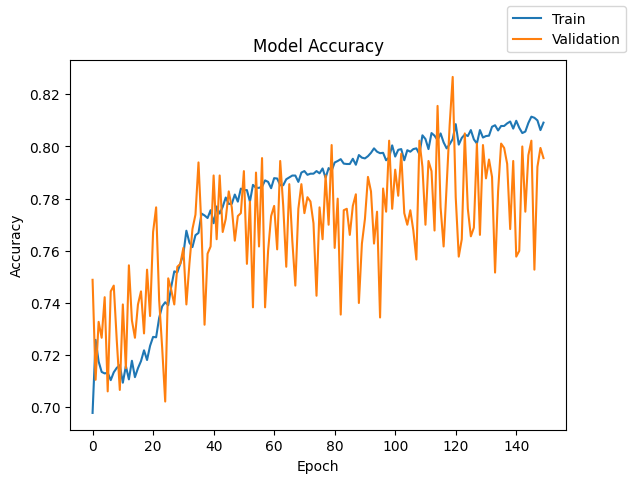

In [86]:
#plotting accuracy curve
plot(history4,'accuracy')

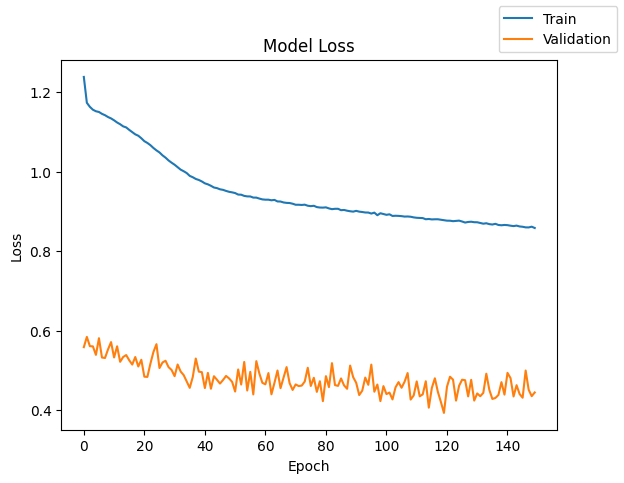

In [87]:
#observing loss curve
plot(history4,'loss')

In [360]:
# result observations
results.loc[4] = [2,[128,32],['tanh','tanh'],150,64,"sgd",['-', "-"],"xavier","-",history4.history["loss"][-1],history4.history["val_loss"][-1],history4.history["accuracy"][-1],history4.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                2                 [64, 32]   
1                2                 [64, 32]   
2                1                       64   
3                2                 [64, 32]   
4                2                [128, 32]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                        [relu, relu]       100        7000       sgd   
1                        [relu, relu]       100          64       sgd   
2                                relu       100          64       sgd   
3                        [relu, tanh]       150          64       sgd   
4                        [tanh, tanh]       150          64       sgd   

  learning rate, momentum weight initializer regularization  train loss  \
0                  [-, -]             xavier              -    1.251845   
1                  [-, -]             xavier              -    0.841307   
2                  [-, -]             xavier              -    0.934649   
3                  [-, -]             xavier              -    0.830580   
4                  [-, -]             xavier              -    0.858299   

   validation loss  train accuracy  validation accuracy  time (secs)  
0         0.608909        0.724714             0.726667     -7129.34  
1         0.463114        0.811714             0.774444     -7129.34  
2         0.493455        0.782857             0.756111     -7129.34  
3         0.404369        0.812571             0.813889     -7129.34  
4         0.444290        0.809143             0.795556     -7129.34

In [89]:
#observing training dataset performance
model_performance_classification(model4, X_train, y_train)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.814571  0.814571   0.854701  0.826628

In [90]:
#Observing validation performance
model_performance_classification(model4, X_val, y_val)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.795556  0.795556   0.839876  0.808817

**Observations**
- Model accuracy and recall decreased and oscillations increased.

**Model 5**

We'll start out with a baseline model having the following configuration:

- 1 input, 2 hidden(64,32), 1 output layers
- tanh and tanh activations for the first and second hidden layer respectively
- Stochastic Gradient Descent (SGD)

In [91]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [92]:
#define model 5
model5 = Sequential()
model5.add(Dense(64,activation="tanh",input_dim=X_train.shape[1]))
model5.add(Dense(32,activation="tanh"))
model5.add(Dense(1,activation="sigmoid"))

In [93]:
#model summary
model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
#complile model
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model5.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [95]:
# start training the model
start = time.time()
history5 = model5.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=150,class_weight=cw_dict, verbose=2,batch_size = 64)


Epoch 1/150
110/110 - 1s - 12ms/step - accuracy: 0.6674 - loss: 1.3306 - val_accuracy: 0.6978 - val_loss: 0.6239
Epoch 2/150
110/110 - 1s - 9ms/step - accuracy: 0.7209 - loss: 1.2017 - val_accuracy: 0.7294 - val_loss: 0.5751
Epoch 3/150
110/110 - 1s - 5ms/step - accuracy: 0.7223 - loss: 1.1704 - val_accuracy: 0.7417 - val_loss: 0.5569
Epoch 4/150
110/110 - 1s - 6ms/step - accuracy: 0.7223 - loss: 1.1574 - val_accuracy: 0.7339 - val_loss: 0.5556
Epoch 5/150
110/110 - 0s - 4ms/step - accuracy: 0.7219 - loss: 1.1493 - val_accuracy: 0.7222 - val_loss: 0.5715
Epoch 6/150
110/110 - 0s - 4ms/step - accuracy: 0.7171 - loss: 1.1446 - val_accuracy: 0.7256 - val_loss: 0.5617
Epoch 7/150
110/110 - 0s - 3ms/step - accuracy: 0.7207 - loss: 1.1393 - val_accuracy: 0.7311 - val_loss: 0.5565
Epoch 8/150
110/110 - 1s - 6ms/step - accuracy: 0.7149 - loss: 1.1357 - val_accuracy: 0.7244 - val_loss: 0.5600
Epoch 9/150
110/110 - 1s - 5ms/step - accuracy: 0.7149 - loss: 1.1317 - val_accuracy: 0.7217 - val_loss

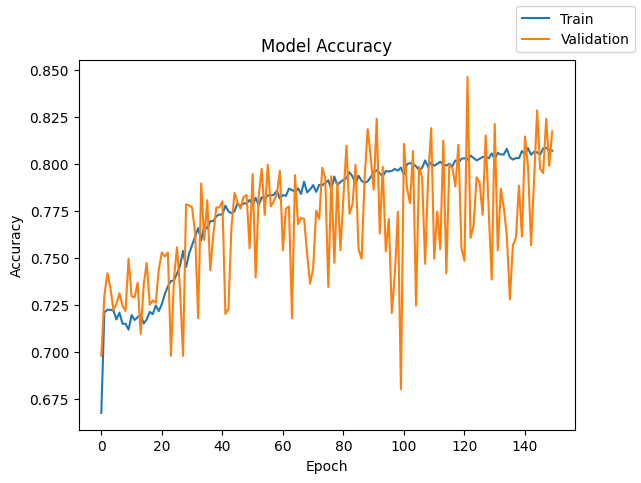

In [96]:
#Observing accuracy curve
plot(history5,'accuracy')

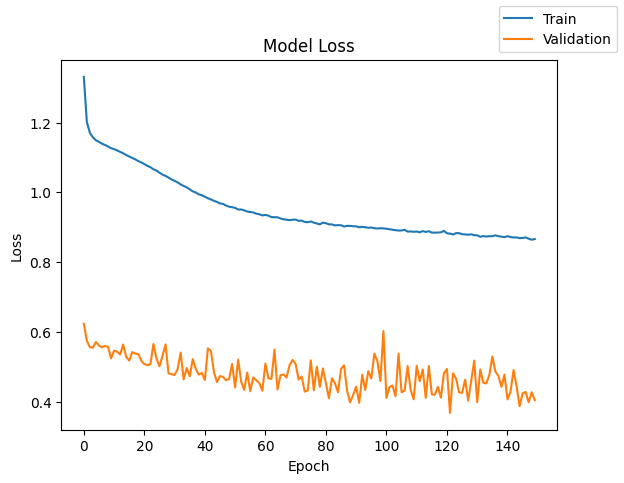

In [97]:
#Observing Loss curve
plot(history5,'loss')

In [361]:
#Observing all model paramerters
results.loc[5] = [2,[64,32],['tanh','tanh'],150,64,"sgd",['-', "-"],"xavier","-",history5.history["loss"][-1],history5.history["val_loss"][-1],history5.history["accuracy"][-1],history5.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                2                 [64, 32]   
1                2                 [64, 32]   
2                1                       64   
3                2                 [64, 32]   
4                2                [128, 32]   
5                2                 [64, 32]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                        [relu, relu]       100        7000       sgd   
1                        [relu, relu]       100          64       sgd   
2                                relu       100          64       sgd   
3                        [relu, tanh]       150          64       sgd   
4                        [tanh, tanh]       150          64       sgd   
5                        [tanh, tanh]       150          64       sgd   

  learning rate, momentum weight initializer regularization  train loss  \
0                  [-, -]             xavier              -    1.251845   
1                  [-, -]             xavier              -    0.841307   
2                  [-, -]             xavier              -    0.934649   
3                  [-, -]             xavier              -    0.830580   
4                  [-, -]             xavier              -    0.858299   
5                  [-, -]             xavier              -    0.866516   

   validation loss  train accuracy  validation accuracy  time (secs)  
0         0.608909        0.724714             0.726667     -7129.34  
1         0.463114        0.811714             0.774444     -7129.34  
2         0.493455        0.782857             0.756111     -7129.34  
3         0.404369        0.812571             0.813889     -7129.34  
4         0.444290        0.809143             0.795556     -7129.34  
5         0.405230        0.806857             0.817222     -7129.34

In [99]:
#Observing model performace for training data
model_performance_classification(model5, X_train, y_train)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.831143  0.831143   0.854051  0.839051

In [100]:
#Observing model performance for validation data
model_performance_classification(model5, X_val, y_val)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.817222  0.817222   0.841289   0.82558

**Observations**
- Improvement in Accuracy,recall and F1_score.
- But,This model is not performing that well as compared to model 3.


**Model 6**
- Let's use model 3 with changing learning rate and adding momemtum
  -  1 input, 2 hidden, 1 output layers
  - relu and tanh activations for the first and second hidden layer respectively
  - Stochastic Gradient Descent (SGD)
  - Learning rate 0.001 and momentum 0.3
  - batch size=128

In [101]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [102]:
#define model
model6 = Sequential()
model6.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model6.add(Dense(32,activation="tanh"))
model6.add(Dense(1,activation="sigmoid"))

In [103]:
# model summary
model6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
#Compile model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.3)    # defining SGD as the optimizer to be used
model6.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [105]:
# start training the model
start = time.time()
history6 = model6.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=150,class_weight=cw_dict, verbose=2,batch_size = 128)


Epoch 1/150
55/55 - 2s - 32ms/step - accuracy: 0.3093 - loss: 1.3995 - val_accuracy: 0.3778 - val_loss: 0.7793
Epoch 2/150
55/55 - 1s - 15ms/step - accuracy: 0.4064 - loss: 1.3517 - val_accuracy: 0.4583 - val_loss: 0.7262
Epoch 3/150
55/55 - 0s - 4ms/step - accuracy: 0.4903 - loss: 1.3253 - val_accuracy: 0.5272 - val_loss: 0.6946
Epoch 4/150
55/55 - 0s - 5ms/step - accuracy: 0.5429 - loss: 1.3075 - val_accuracy: 0.5733 - val_loss: 0.6733
Epoch 5/150
55/55 - 0s - 5ms/step - accuracy: 0.5811 - loss: 1.2939 - val_accuracy: 0.5956 - val_loss: 0.6604
Epoch 6/150
55/55 - 0s - 5ms/step - accuracy: 0.5983 - loss: 1.2825 - val_accuracy: 0.6094 - val_loss: 0.6499
Epoch 7/150
55/55 - 0s - 6ms/step - accuracy: 0.6227 - loss: 1.2726 - val_accuracy: 0.6294 - val_loss: 0.6418
Epoch 8/150
55/55 - 0s - 5ms/step - accuracy: 0.6349 - loss: 1.2637 - val_accuracy: 0.6400 - val_loss: 0.6354
Epoch 9/150
55/55 - 0s - 6ms/step - accuracy: 0.6470 - loss: 1.2559 - val_accuracy: 0.6472 - val_loss: 0.6308
Epoch 10

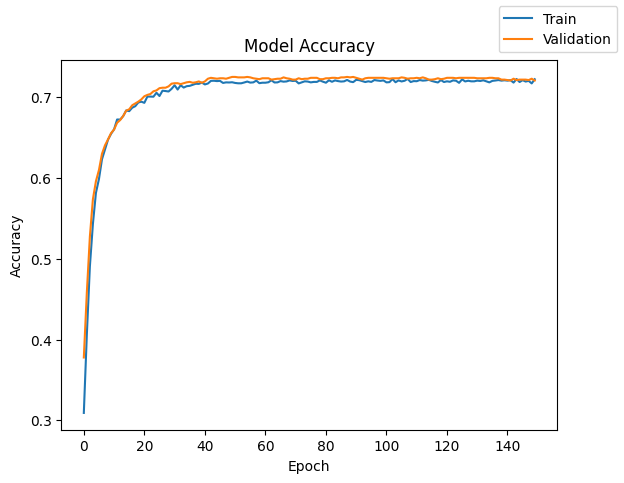

In [106]:
#plot accuracy curve
plot(history6,'accuracy')


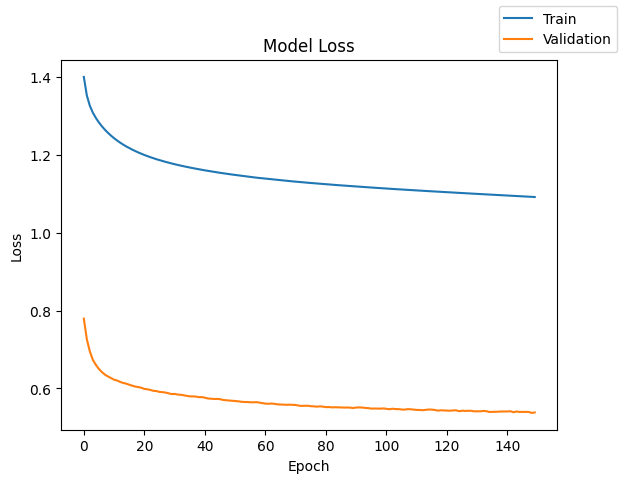

In [107]:
#observe loss curve
plot(history6,'loss')


In [362]:
#Observing result table
results.loc[6] = [2,[64,32],['relu','tanh'],150,128,"sgd",[0.001,0.3],"xavier","-",history6.history["loss"][-1],history6.history["val_loss"][-1],history6.history["accuracy"][-1],history6.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                2                 [64, 32]   
1                2                 [64, 32]   
2                1                       64   
3                2                 [64, 32]   
4                2                [128, 32]   
5                2                 [64, 32]   
6                2                 [64, 32]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                        [relu, relu]       100        7000       sgd   
1                        [relu, relu]       100          64       sgd   
2                                relu       100          64       sgd   
3                        [relu, tanh]       150          64       sgd   
4                        [tanh, tanh]       150          64       sgd   
5                        [tanh, tanh]       150          64       sgd   
6                        [relu, tanh]       150         128       sgd   

  learning rate, momentum weight initializer regularization  train loss  \
0                  [-, -]             xavier              -    1.251845   
1                  [-, -]             xavier              -    0.841307   
2                  [-, -]             xavier              -    0.934649   
3                  [-, -]             xavier              -    0.830580   
4                  [-, -]             xavier              -    0.858299   
5                  [-, -]             xavier              -    0.866516   
6            [0.001, 0.3]             xavier              -    1.091327   

   validation loss  train accuracy  validation accuracy  time (secs)  
0         0.608909        0.724714             0.726667     -7129.34  
1         0.463114        0.811714             0.774444     -7129.34  
2         0.493455        0.782857             0.756111     -7129.34  
3         0.404369        0.812571             0.813889     -7129.34  
4         0.444290        0.809143             0.795556     -7129.34  
5         0.405230        0.806857             0.817222     -7129.34  
6         0.538426        0.721571             0.720000     -7129.34

In [109]:
#Observing model performance for training dataset
model_performance_classification(model6, X_train, y_train)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.719714  0.719714   0.809513  0.744784

In [110]:
#observing model performance for validation data
model_performance_classification(model6, X_val, y_val)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy  Recall  Precision  F1 Score
0      0.72    0.72   0.801933  0.743146

**Observations**
- Perfromance decreased but oscillations reduced.

**Model 7**

Let's design model with change in momentum and chage in batch size and neuron numbers
- 1 input, 2 hidden(64,32), 1 output layers
- relu and tanh activations for the first and second hidden layer respectively
- Stochastic Gradient Descent (SGD)
- learning rate=0.001,momemtum =0.9
- batch size=32

In [111]:
#clear keras session
tf.keras.backend.clear_session()

In [112]:
#define model
model7 = Sequential()
model7.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model7.add(Dense(32,activation="tanh"))
model7.add(Dense(1,activation="sigmoid"))

In [113]:
#compile model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)    # defining SGD as the optimizer to be used
model7.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [114]:
#start training
start = time.time()
history7 = model7.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=150,class_weight=cw_dict, verbose=2,batch_size = 32)

Epoch 1/150
219/219 - 3s - 12ms/step - accuracy: 0.6927 - loss: 1.2256 - val_accuracy: 0.6833 - val_loss: 0.6025
Epoch 2/150
219/219 - 1s - 3ms/step - accuracy: 0.7089 - loss: 1.1585 - val_accuracy: 0.7356 - val_loss: 0.5521
Epoch 3/150
219/219 - 1s - 3ms/step - accuracy: 0.7101 - loss: 1.1427 - val_accuracy: 0.6400 - val_loss: 0.6363
Epoch 4/150
219/219 - 1s - 3ms/step - accuracy: 0.7067 - loss: 1.1328 - val_accuracy: 0.7289 - val_loss: 0.5393
Epoch 5/150
219/219 - 1s - 4ms/step - accuracy: 0.7126 - loss: 1.1220 - val_accuracy: 0.6894 - val_loss: 0.5813
Epoch 6/150
219/219 - 1s - 5ms/step - accuracy: 0.7099 - loss: 1.1127 - val_accuracy: 0.6956 - val_loss: 0.5674
Epoch 7/150
219/219 - 1s - 3ms/step - accuracy: 0.7124 - loss: 1.1053 - val_accuracy: 0.7678 - val_loss: 0.4833
Epoch 8/150
219/219 - 1s - 6ms/step - accuracy: 0.7171 - loss: 1.0947 - val_accuracy: 0.6983 - val_loss: 0.5556
Epoch 9/150
219/219 - 1s - 6ms/step - accuracy: 0.7187 - loss: 1.0860 - val_accuracy: 0.7006 - val_loss

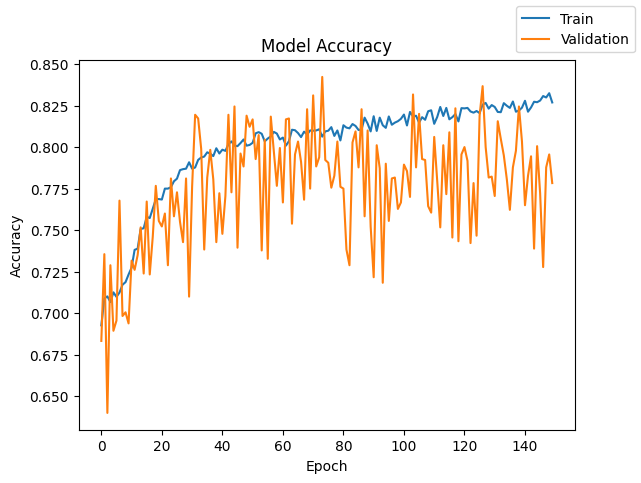

In [115]:
#plot accuracy curve
plot(history7,'accuracy')

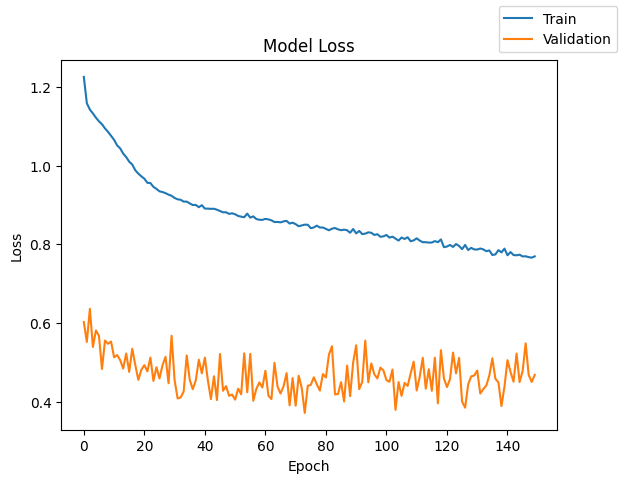

In [116]:
#plot loss curve
plot(history7,'loss')

In [363]:
#Comapring all results
results.loc[7] = [2,[64,32],['relu','tanh'],150,32,"sgd",[0.001,0.9],"xavier","-",history7.history["loss"][-1],history7.history["val_loss"][-1],history7.history["accuracy"][-1],history7.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                2                 [64, 32]   
1                2                 [64, 32]   
2                1                       64   
3                2                 [64, 32]   
4                2                [128, 32]   
5                2                 [64, 32]   
6                2                 [64, 32]   
7                2                 [64, 32]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                        [relu, relu]       100        7000       sgd   
1                        [relu, relu]       100          64       sgd   
2                                relu       100          64       sgd   
3                        [relu, tanh]       150          64       sgd   
4                        [tanh, tanh]       150          64       sgd   
5                        [tanh, tanh]       150          64       sgd   
6                        [relu, tanh]       150         128       sgd   
7                        [relu, tanh]       150          32       sgd   

  learning rate, momentum weight initializer regularization  train loss  \
0                  [-, -]             xavier              -    1.251845   
1                  [-, -]             xavier              -    0.841307   
2                  [-, -]             xavier              -    0.934649   
3                  [-, -]             xavier              -    0.830580   
4                  [-, -]             xavier              -    0.858299   
5                  [-, -]             xavier              -    0.866516   
6            [0.001, 0.3]             xavier              -    1.091327   
7            [0.001, 0.9]             xavier              -    0.769514   

   validation loss  train accuracy  validation accuracy  time (secs)  
0         0.608909        0.724714             0.726667     -7129.34  
1         0.463114        0.811714             0.774444     -7129.34  
2         0.493455        0.782857             0.756111     -7129.34  
3         0.404369        0.812571             0.813889     -7129.34  
4         0.444290        0.809143             0.795556     -7129.34  
5         0.405230        0.806857             0.817222     -7129.34  
6         0.538426        0.721571             0.720000     -7129.34  
7         0.468413        0.826857             0.778333     -7129.34

In [118]:
#model performance
model_performance_classification(model7, X_train, y_train)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.829143  0.829143   0.873458  0.841088

In [119]:
#model performance for validation
model_performance_classification(model7, X_val, y_val)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.778333  0.778333   0.827245  0.793238

**Observations**
- Model loss has reduced and improved training accuracy but not validationaccuracy  more oscillations.
- Let's make few changes with respect to number of epoches and learning rate and momemtum

**Model 8**

Let's design model with change in momentum and chage in batch size and neuron numbers
- 1 input, 2 hidden(64,32), 1 output layers
- relu and tanh activations for the first and second hidden layer respectively
- Stochastic Gradient Descent (SGD)
- learning rate=0.001,momemtum =0.7
- batch size=32
- epoch=150

In [120]:
#clear keras session
tf.keras.backend.clear_session()

In [121]:
#define model
model8 = Sequential()
model8.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model8.add(Dense(32,activation="tanh"))
model8.add(Dense(1,activation="sigmoid"))

In [122]:
#model summary
model8.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:
#Complie model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.7)    # defining SGD as the optimizer to be used
model8.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [124]:
#Start training
start = time.time()
history8 = model8.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=150,class_weight=cw_dict, verbose=2,batch_size = 32)


Epoch 1/150
219/219 - 2s - 9ms/step - accuracy: 0.5714 - loss: 1.3326 - val_accuracy: 0.6511 - val_loss: 0.6335
Epoch 2/150
219/219 - 1s - 3ms/step - accuracy: 0.6820 - loss: 1.2539 - val_accuracy: 0.6811 - val_loss: 0.6168
Epoch 3/150
219/219 - 1s - 3ms/step - accuracy: 0.6960 - loss: 1.2168 - val_accuracy: 0.7028 - val_loss: 0.5987
Epoch 4/150
219/219 - 1s - 3ms/step - accuracy: 0.7024 - loss: 1.1949 - val_accuracy: 0.7378 - val_loss: 0.5635
Epoch 5/150
219/219 - 1s - 3ms/step - accuracy: 0.7224 - loss: 1.1798 - val_accuracy: 0.6978 - val_loss: 0.5977
Epoch 6/150
219/219 - 1s - 3ms/step - accuracy: 0.7093 - loss: 1.1707 - val_accuracy: 0.7200 - val_loss: 0.5717
Epoch 7/150
219/219 - 1s - 3ms/step - accuracy: 0.7097 - loss: 1.1619 - val_accuracy: 0.7256 - val_loss: 0.5622
Epoch 8/150
219/219 - 1s - 3ms/step - accuracy: 0.7136 - loss: 1.1559 - val_accuracy: 0.7378 - val_loss: 0.5482
Epoch 9/150
219/219 - 1s - 3ms/step - accuracy: 0.7160 - loss: 1.1508 - val_accuracy: 0.7283 - val_loss:

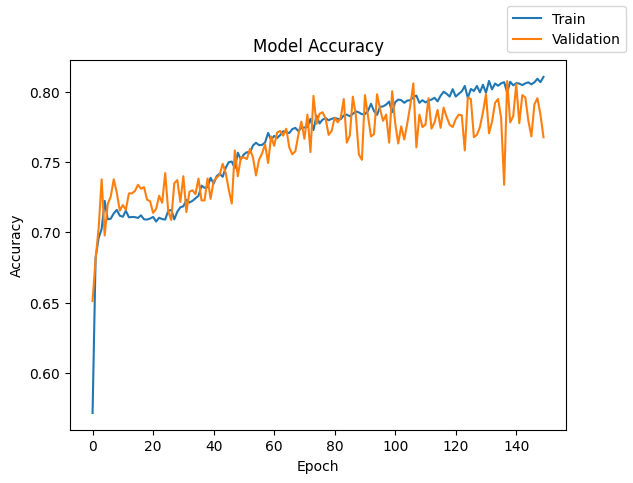

In [125]:
#observing accuracy plot
plot(history8,'accuracy')

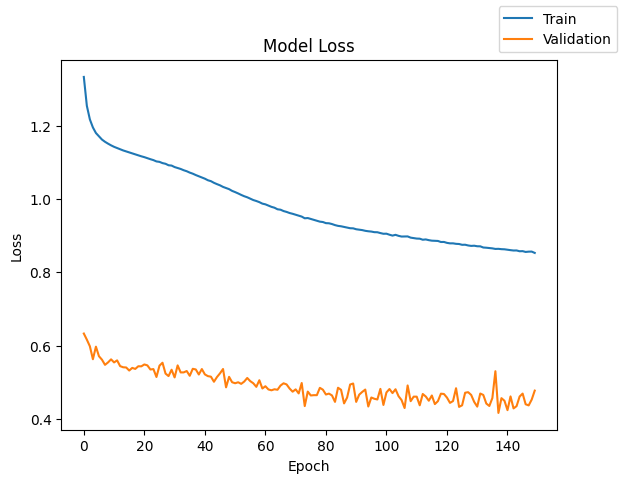

In [126]:
#observing loss
plot(history8,'loss')

In [364]:
#comparing with other models
results.loc[8] = [2,[64,32],['relu','tanh'],50,32,"sgd",[0.001,0.7],"xavier","-",history8.history["loss"][-1],history8.history["val_loss"][-1],history8.history["accuracy"][-1],history8.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                2                 [64, 32]   
1                2                 [64, 32]   
2                1                       64   
3                2                 [64, 32]   
4                2                [128, 32]   
5                2                 [64, 32]   
6                2                 [64, 32]   
7                2                 [64, 32]   
8                2                 [64, 32]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                        [relu, relu]       100        7000       sgd   
1                        [relu, relu]       100          64       sgd   
2                                relu       100          64       sgd   
3                        [relu, tanh]       150          64       sgd   
4                        [tanh, tanh]       150          64       sgd   
5                        [tanh, tanh]       150          64       sgd   
6                        [relu, tanh]       150         128       sgd   
7                        [relu, tanh]       150          32       sgd   
8                        [relu, tanh]        50          32       sgd   

  learning rate, momentum weight initializer regularization  train loss  \
0                  [-, -]             xavier              -    1.251845   
1                  [-, -]             xavier              -    0.841307   
2                  [-, -]             xavier              -    0.934649   
3                  [-, -]             xavier              -    0.830580   
4                  [-, -]             xavier              -    0.858299   
5                  [-, -]             xavier              -    0.866516   
6            [0.001, 0.3]             xavier              -    1.091327   
7            [0.001, 0.9]             xavier              -    0.769514   
8            [0.001, 0.7]             xavier              -    0.853101   

   validation loss  train accuracy  validation accuracy  time (secs)  
0         0.608909        0.724714             0.726667     -7129.34  
1         0.463114        0.811714             0.774444     -7129.34  
2         0.493455        0.782857             0.756111     -7129.34  
3         0.404369        0.812571             0.813889     -7129.34  
4         0.444290        0.809143             0.795556     -7129.34  
5         0.405230        0.806857             0.817222     -7129.34  
6         0.538426        0.721571             0.720000     -7129.34  
7         0.468413        0.826857             0.778333     -7129.34  
8         0.477964        0.810714             0.767778     -7129.34

In [128]:
#model performance for training data
model_performance_classification(model8, X_train, y_train)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.790714  0.790714   0.853476   0.80747

In [129]:
#model performace for validation
model_performance_classification(model8, X_val, y_val)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.767778  0.767778   0.834837  0.785876

**Observations**
- Performance is not that good as previous.

**Model 9**

Let's design model with change in momentum and chage in batch size and neuron numbers

- 1 input, 2 hidden(64,32), 1 output layers
- relu and tanh activations for the first and second hidden layer respectively
- Stochastic Gradient Descent (SGD)
- learning rate=0.001,momemtum =0.4
- batch size=64
- epoch=100

In [130]:
#clear keras session
tf.keras.backend.clear_session()

In [131]:
#define model
model9 = Sequential()
model9.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model9.add(Dense(32,activation="tanh"))
model9.add(Dense(1,activation="sigmoid"))

In [132]:
#model summary
model9.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
# compile model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.4)    # defining SGD as the optimizer to be used
model9.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [134]:
#start training
start = time.time()
history9 = model9.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=100,class_weight=cw_dict, verbose=2,batch_size = 64)

Epoch 1/100
110/110 - 2s - 15ms/step - accuracy: 0.4793 - loss: 1.4018 - val_accuracy: 0.5250 - val_loss: 0.6966
Epoch 2/100
110/110 - 1s - 9ms/step - accuracy: 0.5714 - loss: 1.3622 - val_accuracy: 0.5933 - val_loss: 0.6714
Epoch 3/100
110/110 - 1s - 6ms/step - accuracy: 0.6271 - loss: 1.3307 - val_accuracy: 0.6472 - val_loss: 0.6527
Epoch 4/100
110/110 - 0s - 4ms/step - accuracy: 0.6659 - loss: 1.3048 - val_accuracy: 0.6733 - val_loss: 0.6391
Epoch 5/100
110/110 - 1s - 5ms/step - accuracy: 0.6876 - loss: 1.2829 - val_accuracy: 0.6900 - val_loss: 0.6298
Epoch 6/100
110/110 - 1s - 6ms/step - accuracy: 0.6910 - loss: 1.2646 - val_accuracy: 0.7083 - val_loss: 0.6193
Epoch 7/100
110/110 - 0s - 4ms/step - accuracy: 0.7039 - loss: 1.2490 - val_accuracy: 0.7133 - val_loss: 0.6130
Epoch 8/100
110/110 - 1s - 5ms/step - accuracy: 0.7096 - loss: 1.2358 - val_accuracy: 0.7094 - val_loss: 0.6092
Epoch 9/100
110/110 - 1s - 6ms/step - accuracy: 0.7046 - loss: 1.2246 - val_accuracy: 0.7150 - val_loss

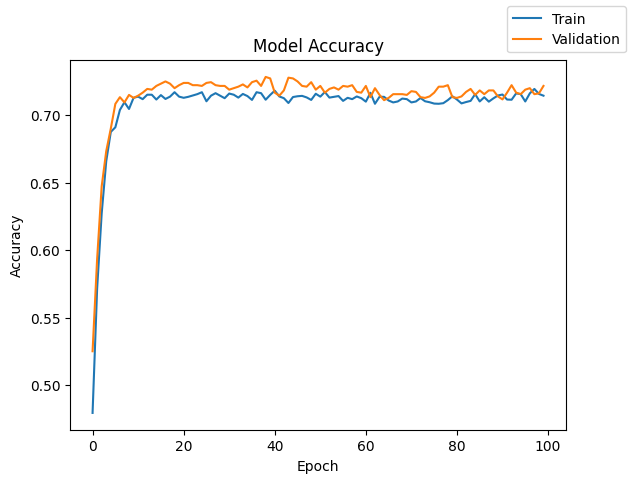

In [135]:
#plot accuracy curve
plot(history9,'accuracy')

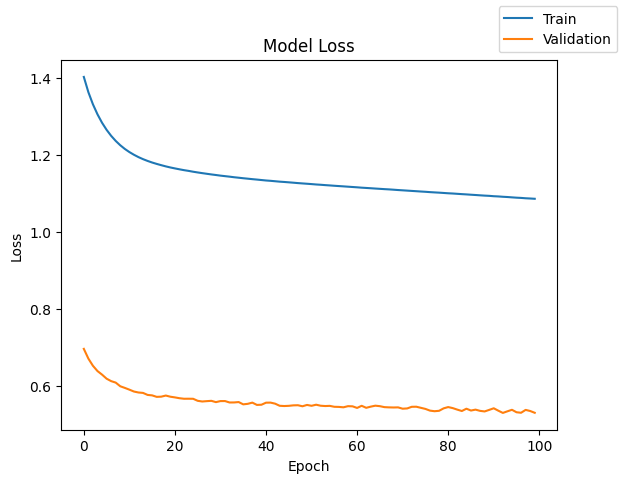

In [136]:
#observe Loss curve
plot(history9,'loss')

In [365]:
# comparing perfomance with other models
results.loc[9] = [2,[64,32],['relu','tanh'],100,64,"sgd",[0.001,0.4],"xavier","-",history9.history["loss"][-1],history9.history["val_loss"][-1],history9.history["accuracy"][-1],history9.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                2                 [64, 32]   
1                2                 [64, 32]   
2                1                       64   
3                2                 [64, 32]   
4                2                [128, 32]   
5                2                 [64, 32]   
6                2                 [64, 32]   
7                2                 [64, 32]   
8                2                 [64, 32]   
9                2                 [64, 32]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                        [relu, relu]       100        7000       sgd   
1                        [relu, relu]       100          64       sgd   
2                                relu       100          64       sgd   
3                        [relu, tanh]       150          64       sgd   
4                        [tanh, tanh]       150          64       sgd   
5                        [tanh, tanh]       150          64       sgd   
6                        [relu, tanh]       150         128       sgd   
7                        [relu, tanh]       150          32       sgd   
8                        [relu, tanh]        50          32       sgd   
9                        [relu, tanh]       100          64       sgd   

  learning rate, momentum weight initializer regularization  train loss  \
0                  [-, -]             xavier              -    1.251845   
1                  [-, -]             xavier              -    0.841307   
2                  [-, -]             xavier              -    0.934649   
3                  [-, -]             xavier              -    0.830580   
4                  [-, -]             xavier              -    0.858299   
5                  [-, -]             xavier              -    0.866516   
6            [0.001, 0.3]             xavier              -    1.091327   
7            [0.001, 0.9]             xavier              -    0.769514   
8            [0.001, 0.7]             xavier              -    0.853101   
9            [0.001, 0.4]             xavier              -    1.085786   

   validation loss  train accuracy  validation accuracy  time (secs)  
0         0.608909        0.724714             0.726667     -7129.34  
1         0.463114        0.811714             0.774444     -7129.34  
2         0.493455        0.782857             0.756111     -7129.34  
3         0.404369        0.812571             0.813889     -7129.34  
4         0.444290        0.809143             0.795556     -7129.34  
5         0.405230        0.806857             0.817222     -7129.34  
6         0.538426        0.721571             0.720000     -7129.34  
7         0.468413        0.826857             0.778333     -7129.34  
8         0.477964        0.810714             0.767778     -7129.34  
9         0.530878        0.714429             0.721667     -7129.34

In [138]:
#Observing model performance for training data
model_performance_classification(model9, X_train, y_train)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.720714  0.720714    0.80751  0.745386

In [139]:
#Observing model perfomance with validation data
model_performance_classification(model9, X_val, y_val)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.721667  0.721667    0.80694  0.745043

**Observations**
- Performance is not good as model 7.
- Accuracy reduced and loss increased for both training and validation.

**Model 10**

Let's design model with change in momentum and chage in batch size and neuron numbers
- 1 input, 2 hidden(64,32), 1 output layers
- relu and tanh activations for the first and second hidden layer respectively
- Stochastic Gradient Descent (SGD)
- learning rate=0.001,momemtum =0.9
- batch size=32
- Add dropout of 0.2

In [140]:
#clear keras session
tf.keras.backend.clear_session()

In [141]:
#define model parameters
model10 = Sequential()
model10.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model10.add(Dropout(0.2))
model10.add(Dense(32,activation="tanh"))
model10.add(Dense(1,activation="sigmoid"))

In [142]:
#model summary
model10.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
# compile model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)    # defining SGD as the optimizer to be used
model10.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [144]:
#start training
start = time.time()
history10 = model10.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=100,class_weight=cw_dict, verbose=2,batch_size = 32)

Epoch 1/100
219/219 - 2s - 7ms/step - accuracy: 0.6033 - loss: 1.3192 - val_accuracy: 0.6672 - val_loss: 0.6256
Epoch 2/100
219/219 - 1s - 3ms/step - accuracy: 0.6794 - loss: 1.2207 - val_accuracy: 0.7161 - val_loss: 0.5776
Epoch 3/100
219/219 - 1s - 3ms/step - accuracy: 0.7007 - loss: 1.1931 - val_accuracy: 0.7006 - val_loss: 0.5933
Epoch 4/100
219/219 - 1s - 3ms/step - accuracy: 0.7074 - loss: 1.1708 - val_accuracy: 0.7139 - val_loss: 0.5785
Epoch 5/100
219/219 - 1s - 3ms/step - accuracy: 0.7109 - loss: 1.1602 - val_accuracy: 0.6928 - val_loss: 0.5926
Epoch 6/100
219/219 - 1s - 2ms/step - accuracy: 0.7011 - loss: 1.1499 - val_accuracy: 0.7322 - val_loss: 0.5484
Epoch 7/100
219/219 - 1s - 3ms/step - accuracy: 0.7061 - loss: 1.1459 - val_accuracy: 0.7378 - val_loss: 0.5394
Epoch 8/100
219/219 - 1s - 3ms/step - accuracy: 0.7056 - loss: 1.1382 - val_accuracy: 0.7417 - val_loss: 0.5314
Epoch 9/100
219/219 - 1s - 3ms/step - accuracy: 0.7126 - loss: 1.1230 - val_accuracy: 0.7478 - val_loss:

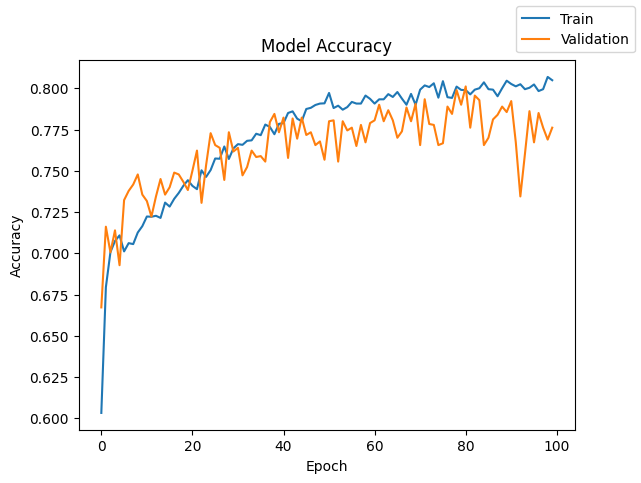

In [145]:
#plot accuracy curve
plot(history10,'accuracy')

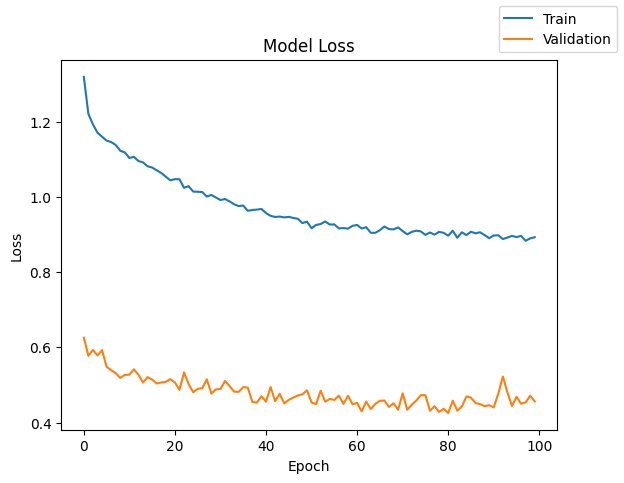

In [146]:
#plot loss
plot(history10,'loss')

In [366]:
#Comparing all models
results.loc[10] = [2,[64,32],['relu','tanh'],100,32,"sgd",[0.001,0.9],"xavier",["dropout:0.2"],history10.history["loss"][-1],history10.history["val_loss"][-1],history10.history["accuracy"][-1],history10.history["val_accuracy"][-1],round(end  - start,2)]

results

# hidden layers # neurons - hidden layer  \
0                 2                 [64, 32]   
1                 2                 [64, 32]   
2                 1                       64   
3                 2                 [64, 32]   
4                 2                [128, 32]   
5                 2                 [64, 32]   
6                 2                 [64, 32]   
7                 2                 [64, 32]   
8                 2                 [64, 32]   
9                 2                 [64, 32]   
10                2                 [64, 32]   

   activation function - hidden layer   # epochs  batch size optimizer  \
0                         [relu, relu]       100        7000       sgd   
1                         [relu, relu]       100          64       sgd   
2                                 relu       100          64       sgd   
3                         [relu, tanh]       150          64       sgd   
4                         [tanh, tanh]       150          64       sgd   
5                         [tanh, tanh]       150          64       sgd   
6                         [relu, tanh]       150         128       sgd   
7                         [relu, tanh]       150          32       sgd   
8                         [relu, tanh]        50          32       sgd   
9                         [relu, tanh]       100          64       sgd   
10                        [relu, tanh]       100          32       sgd   

   learning rate, momentum weight initializer regularization  train loss  \
0                   [-, -]             xavier              -    1.251845   
1                   [-, -]             xavier              -    0.841307   
2                   [-, -]             xavier              -    0.934649   
3                   [-, -]             xavier              -    0.830580   
4                   [-, -]             xavier              -    0.858299   
5                   [-, -]             xavier              -    0.866516   
6             [0.001, 0.3]             xavier              -    1.091327   
7             [0.001, 0.9]             xavier              -    0.769514   
8             [0.001, 0.7]             xavier              -    0.853101   
9             [0.001, 0.4]             xavier              -    1.085786   
10            [0.001, 0.9]             xavier  [dropout:0.2]    0.892885   

    validation loss  train accuracy  validation accuracy  time (secs)  
0          0.608909        0.724714             0.726667     -7129.34  
1          0.463114        0.811714             0.774444     -7129.34  
2          0.493455        0.782857             0.756111     -7129.34  
3          0.404369        0.812571             0.813889     -7129.34  
4          0.444290        0.809143             0.795556     -7129.34  
5          0.405230        0.806857             0.817222     -7129.34  
6          0.538426        0.721571             0.720000     -7129.34  
7          0.468413        0.826857             0.778333     -7129.34  
8          0.477964        0.810714             0.767778     -7129.34  
9          0.530878        0.714429             0.721667     -7129.34  
10         0.456302        0.804857             0.776111     -7129.34

**Observation**
- This model,Loss is slightly reduced but also Accuracy than model 7 and 3.

**Model 11**

Let's design model with change in momentum and chage in batch size and neuron numbers
- 1 input, 2 hidden(64,32), 1 output layers
- relu and tanh activations for the first and second hidden layer respectively
- Stochastic Gradient Descent (SGD)
- learning rate=0.001,momemtum =0.9
- batch size=32
- Add dropout of 0.2
- add batchnormalization

In [160]:
#clear keras
tf.keras.backend.clear_session()

In [161]:
#define model with batch normalization,dropout layer
model11 = Sequential()
model11.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model11.add(BatchNormalization())
model11.add(Dropout(0.2))
model11.add(Dense(32,activation="tanh"))
model11.add(Dense(1,activation="sigmoid"))

In [ ]:
#model summary
model11.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 128 (512.00 B)

In [162]:
#compile model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)    # defining SGD as the optimizer to be used
model11.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [163]:
#start training
start = time.time()
history11 = model11.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=150,class_weight=cw_dict, verbose=1,batch_size = 32)

Epoch 1/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5766 - loss: 1.3942 - val_accuracy: 0.7456 - val_loss: 0.5436
Epoch 2/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6954 - loss: 1.1787 - val_accuracy: 0.7311 - val_loss: 0.5320
Epoch 3/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7006 - loss: 1.1395 - val_accuracy: 0.7211 - val_loss: 0.5370
Epoch 4/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7140 - loss: 1.1366 - val_accuracy: 0.7200 - val_loss: 0.5373
Epoch 5/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7108 - loss: 1.1074 - val_accuracy: 0.7311 - val_loss: 0.5196
Epoch 6/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7152 - loss: 1.1208 - val_accuracy: 0.7500 - val_loss: 0.5094
Epoch 7/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7186 - loss: 1.1064 - val_accuracy: 0.7333 - val_loss: 0.5186
Epoch 8/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7387 - loss: 1.0665 - val_accu

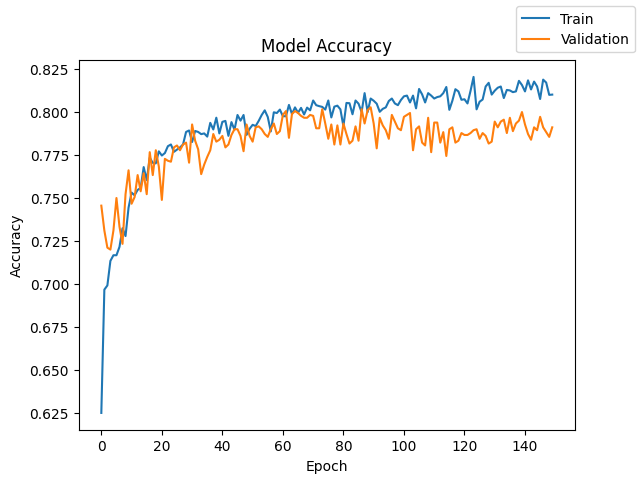

In [164]:
#plot accuracy curve
plot(history11,'accuracy')

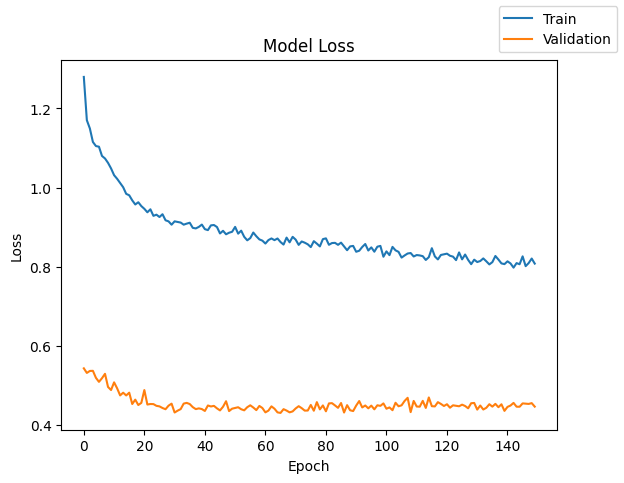

In [165]:
#plot loss curve
plot(history11,'loss')

In [367]:
#model comparison
results.loc[11] = [2,[64,32],['relu','tanh'],100,32,"sgd",[0.001,0.9],"xavier",["dropout:0.2","BatchNormalization"],history11.history["loss"][-1],history11.history["val_loss"][-1],history11.history["accuracy"][-1],history11.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                 2                 [64, 32]   
1                 2                 [64, 32]   
2                 1                       64   
3                 2                 [64, 32]   
4                 2                [128, 32]   
5                 2                 [64, 32]   
6                 2                 [64, 32]   
7                 2                 [64, 32]   
8                 2                 [64, 32]   
9                 2                 [64, 32]   
10                2                 [64, 32]   
11                2                 [64, 32]   

   activation function - hidden layer   # epochs  batch size optimizer  \
0                         [relu, relu]       100        7000       sgd   
1                         [relu, relu]       100          64       sgd   
2                                 relu       100          64       sgd   
3                         [relu, tanh]       150          64       sgd   
4                         [tanh, tanh]       150          64       sgd   
5                         [tanh, tanh]       150          64       sgd   
6                         [relu, tanh]       150         128       sgd   
7                         [relu, tanh]       150          32       sgd   
8                         [relu, tanh]        50          32       sgd   
9                         [relu, tanh]       100          64       sgd   
10                        [relu, tanh]       100          32       sgd   
11                        [relu, tanh]       100          32       sgd   

   learning rate, momentum weight initializer  \
0                   [-, -]             xavier   
1                   [-, -]             xavier   
2                   [-, -]             xavier   
3                   [-, -]             xavier   
4                   [-, -]             xavier   
5                   [-, -]             xavier   
6             [0.001, 0.3]             xavier   
7             [0.001, 0.9]             xavier   
8             [0.001, 0.7]             xavier   
9             [0.001, 0.4]             xavier   
10            [0.001, 0.9]             xavier   
11            [0.001, 0.9]             xavier   

                       regularization  train loss  validation loss  \
0                                   -    1.251845         0.608909   
1                                   -    0.841307         0.463114   
2                                   -    0.934649         0.493455   
3                                   -    0.830580         0.404369   
4                                   -    0.858299         0.444290   
5                                   -    0.866516         0.405230   
6                                   -    1.091327         0.538426   
7                                   -    0.769514         0.468413   
8                                   -    0.853101         0.477964   
9                                   -    1.085786         0.530878   
10                      [dropout:0.2]    0.892885         0.456302   
11  [dropout:0.2, BatchNormalization]    0.808190         0.446884   

    train accuracy  validation accuracy  time (secs)  
0         0.724714             0.726667     -7129.34  
1         0.811714             0.774444     -7129.34  
2         0.782857             0.756111     -7129.34  
3         0.812571             0.813889     -7129.34  
4         0.809143             0.795556     -7129.34  
5         0.806857             0.817222     -7129.34  
6         0.721571             0.720000     -7129.34  
7         0.826857             0.778333     -7129.34  
8         0.810714             0.767778     -7129.34  
9         0.714429             0.721667     -7129.34  
10        0.804857             0.776111     -7129.34  
11        0.810143             0.791111     -7129.34

In [167]:
#model performance for training data
model_performance_classification(model11, X_train, y_train)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0     0.848   0.848   0.884197  0.857765

In [168]:
#Model performance fro validation data
model_performance_classification(model11, X_val, y_val)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.791111  0.791111   0.829434  0.803487

**Observations**
- With this model,we will get more fluctuations to the response.No improvement in performance.


## Model Performance Improvement

### Neural Network with Adam Optimizer

**Model 12**
- With Adam optimizer model 7.
- 1 input, 2 hidden(64,32), 1 output layers
- relu and tanh activations for the first and second hidden layer respectively
- batch size=32

In [169]:
#Clear keras session
tf.keras.backend.clear_session()

In [170]:
#Define model
model12 = Sequential()
model12.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model12.add(Dense(32,activation="tanh"))
model12.add(Dense(1,activation="sigmoid"))

In [171]:
#Model summary
model12.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [172]:
#Compile the model
optimizer = tf.keras.optimizers.Adam()    # defining SGD as the optimizer to be used
model12.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [173]:
#start training
start = time.time()
history12 = model12.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=150,class_weight=cw_dict, verbose=2,batch_size = 32)

Epoch 1/150
219/219 - 3s - 13ms/step - accuracy: 0.7003 - loss: 1.1876 - val_accuracy: 0.6472 - val_loss: 0.6385
Epoch 2/150
219/219 - 1s - 4ms/step - accuracy: 0.7121 - loss: 1.1250 - val_accuracy: 0.7078 - val_loss: 0.5495
Epoch 3/150
219/219 - 1s - 3ms/step - accuracy: 0.7176 - loss: 1.0937 - val_accuracy: 0.7294 - val_loss: 0.5232
Epoch 4/150
219/219 - 1s - 3ms/step - accuracy: 0.7250 - loss: 1.0662 - val_accuracy: 0.7906 - val_loss: 0.4608
Epoch 5/150
219/219 - 1s - 3ms/step - accuracy: 0.7483 - loss: 1.0445 - val_accuracy: 0.7783 - val_loss: 0.4753
Epoch 6/150
219/219 - 1s - 3ms/step - accuracy: 0.7627 - loss: 1.0219 - val_accuracy: 0.7411 - val_loss: 0.5249
Epoch 7/150
219/219 - 1s - 3ms/step - accuracy: 0.7679 - loss: 0.9969 - val_accuracy: 0.7289 - val_loss: 0.5355
Epoch 8/150
219/219 - 1s - 3ms/step - accuracy: 0.7744 - loss: 0.9800 - val_accuracy: 0.7644 - val_loss: 0.5012
Epoch 9/150
219/219 - 1s - 3ms/step - accuracy: 0.7774 - loss: 0.9661 - val_accuracy: 0.7572 - val_loss

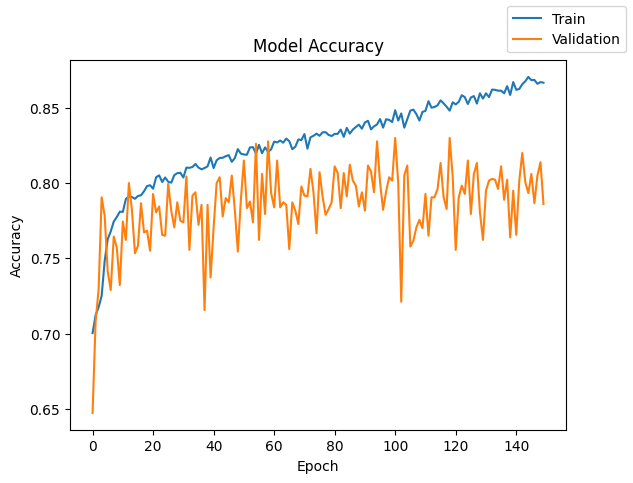

In [174]:
#plot Accuracy
plot(history12,'accuracy')

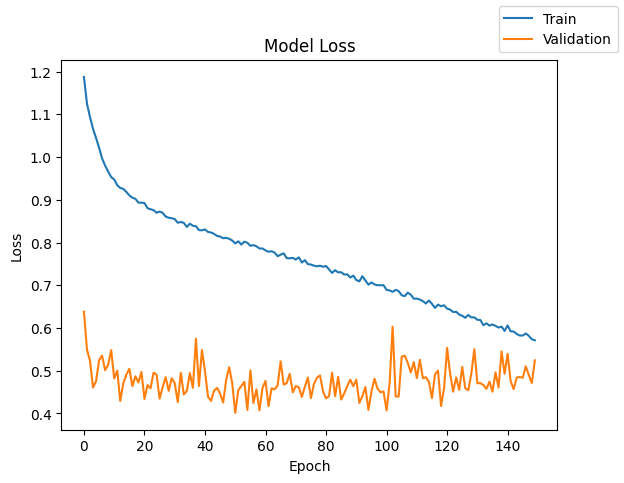

In [175]:
#plot Loss
plot(history12,'loss')

In [368]:
#Comparing model performance
results.loc[12] = [2,[64,32],['relu','tanh'],150,32,"adam",['-', "-"],"xavier","-",history12.history["loss"][-1],history12.history["val_loss"][-1],history12.history["accuracy"][-1],history12.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                 2                 [64, 32]   
1                 2                 [64, 32]   
2                 1                       64   
3                 2                 [64, 32]   
4                 2                [128, 32]   
5                 2                 [64, 32]   
6                 2                 [64, 32]   
7                 2                 [64, 32]   
8                 2                 [64, 32]   
9                 2                 [64, 32]   
10                2                 [64, 32]   
11                2                 [64, 32]   
12                2                 [64, 32]   

   activation function - hidden layer   # epochs  batch size optimizer  \
0                         [relu, relu]       100        7000       sgd   
1                         [relu, relu]       100          64       sgd   
2                                 relu       100          64       sgd   
3                         [relu, tanh]       150          64       sgd   
4                         [tanh, tanh]       150          64       sgd   
5                         [tanh, tanh]       150          64       sgd   
6                         [relu, tanh]       150         128       sgd   
7                         [relu, tanh]       150          32       sgd   
8                         [relu, tanh]        50          32       sgd   
9                         [relu, tanh]       100          64       sgd   
10                        [relu, tanh]       100          32       sgd   
11                        [relu, tanh]       100          32       sgd   
12                        [relu, tanh]       150          32      adam   

   learning rate, momentum weight initializer  \
0                   [-, -]             xavier   
1                   [-, -]             xavier   
2                   [-, -]             xavier   
3                   [-, -]             xavier   
4                   [-, -]             xavier   
5                   [-, -]             xavier   
6             [0.001, 0.3]             xavier   
7             [0.001, 0.9]             xavier   
8             [0.001, 0.7]             xavier   
9             [0.001, 0.4]             xavier   
10            [0.001, 0.9]             xavier   
11            [0.001, 0.9]             xavier   
12                  [-, -]             xavier   

                       regularization  train loss  validation loss  \
0                                   -    1.251845         0.608909   
1                                   -    0.841307         0.463114   
2                                   -    0.934649         0.493455   
3                                   -    0.830580         0.404369   
4                                   -    0.858299         0.444290   
5                                   -    0.866516         0.405230   
6                                   -    1.091327         0.538426   
7                                   -    0.769514         0.468413   
8                                   -    0.853101         0.477964   
9                                   -    1.085786         0.530878   
10                      [dropout:0.2]    0.892885         0.456302   
11  [dropout:0.2, BatchNormalization]    0.808190         0.446884   
12                                  -    0.571309         0.524371   

    train accuracy  validation accuracy  time (secs)  
0         0.724714             0.726667     -7129.34  
1         0.811714             0.774444     -7129.34  
2         0.782857             0.756111     -7129.34  
3         0.812571             0.813889     -7129.34  
4         0.809143             0.795556     -7129.34  
5         0.806857             0.817222     -7129.34  
6         0.721571             0.720000     -7129.34  
7         0.826857             0.778333     -7129.34  
8         0.810714             0.767778     -7129.34  
9         0.714429             0.721667     -7129.34  
10        0.804857   

In [177]:
#model performance for training data
model_performance_classification(model12, X_train, y_train)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.859571  0.859571   0.898801   0.86913

In [178]:
#model performance for validation
model_performance_classification(model12, X_val, y_val)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.786111  0.786111   0.825131  0.798836

**Observations**
- Training and validation loss have reduced to 55% and 47.9% respectively.
- Training and Validation accuracy and recall have improved but not as 3,response shows it has more oscillations.

### Neural Network with Adam Optimizer and Dropout

Let's add dropout layer with adam optimizer.


Adam (Adaptive Moment Estimation) adjusts the learning rate in an adaptive manner
This enables it to converge faster and more reliably compared to SGD with momentum, especially in scenarios with large datasets and complex optimization landscapes

With Adam optimizer model 7.
- 1 input, 2 hidden(64,32), 1 output layers
- relu and tanh activations for the first and second hidden layer respectively.
- batch size=32
- dropout layer of 0.2

In [207]:
#clear keras session
tf.keras.backend.clear_session()

In [209]:
#define model
model14 = Sequential()
model14.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model14.add(Dropout(0.5))
model14.add(Dense(32,activation="tanh"))
model14.add(Dropout(0.5))
model14.add(Dense(1,activation="sigmoid"))

In [210]:
#model summary
model14.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [212]:
#Compile model
optimizer = tf.keras.optimizers.Adam()    # defining SGD as the optimizer to be used
model14.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [213]:
#Start training
start = time.time()
history14 = model14.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=150,class_weight=cw_dict, verbose=2,batch_size = 32)

Epoch 1/150
219/219 - 2s - 10ms/step - accuracy: 0.6087 - loss: 1.3766 - val_accuracy: 0.6967 - val_loss: 0.5926
Epoch 2/150
219/219 - 1s - 3ms/step - accuracy: 0.6597 - loss: 1.2665 - val_accuracy: 0.6750 - val_loss: 0.6019
Epoch 3/150
219/219 - 1s - 4ms/step - accuracy: 0.6713 - loss: 1.2171 - val_accuracy: 0.7017 - val_loss: 0.5788
Epoch 4/150
219/219 - 1s - 6ms/step - accuracy: 0.6797 - loss: 1.2070 - val_accuracy: 0.7306 - val_loss: 0.5396
Epoch 5/150
219/219 - 1s - 6ms/step - accuracy: 0.6947 - loss: 1.1840 - val_accuracy: 0.7122 - val_loss: 0.5533
Epoch 6/150
219/219 - 1s - 3ms/step - accuracy: 0.6910 - loss: 1.1707 - val_accuracy: 0.7233 - val_loss: 0.5448
Epoch 7/150
219/219 - 1s - 6ms/step - accuracy: 0.6950 - loss: 1.1656 - val_accuracy: 0.7417 - val_loss: 0.5256
Epoch 8/150
219/219 - 1s - 3ms/step - accuracy: 0.7040 - loss: 1.1550 - val_accuracy: 0.7161 - val_loss: 0.5523
Epoch 9/150
219/219 - 1s - 6ms/step - accuracy: 0.7093 - loss: 1.1338 - val_accuracy: 0.7339 - val_loss

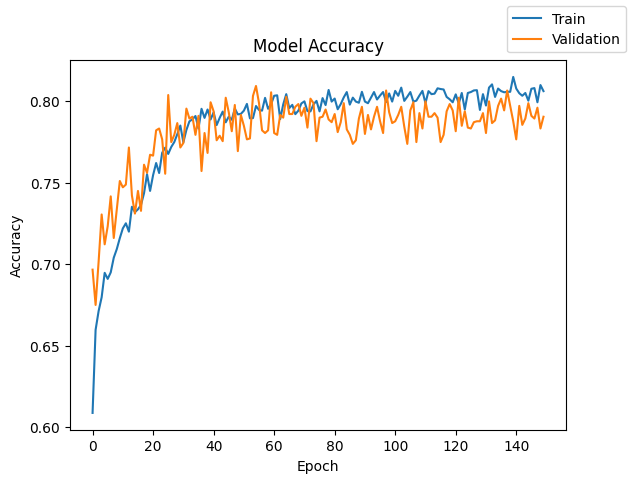

In [214]:
#plot accuracy
plot(history14,'accuracy')

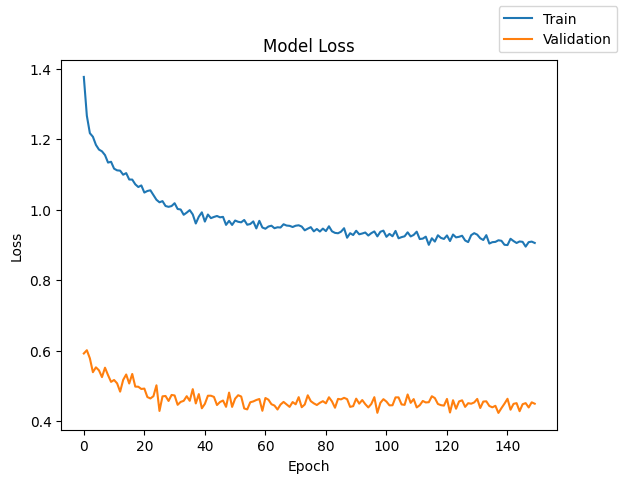

In [215]:
#plot loss
plot(history14,'loss')

In [369]:
#compararing all models
results.loc[14] = [2,[64,32],['relu','tanh'],150,32,"adam",['-', "-"],'xavier',["dropout:0.5","dropout:0.5"],history14.history["loss"][-1],history14.history["val_loss"][-1],history14.history["accuracy"][-1],history14.history["val_accuracy"][-1],round(end-start,2)]
results

# hidden layers # neurons - hidden layer  \
0                 2                 [64, 32]   
1                 2                 [64, 32]   
2                 1                       64   
3                 2                 [64, 32]   
4                 2                [128, 32]   
5                 2                 [64, 32]   
6                 2                 [64, 32]   
7                 2                 [64, 32]   
8                 2                 [64, 32]   
9                 2                 [64, 32]   
10                2                 [64, 32]   
11                2                 [64, 32]   
12                2                 [64, 32]   
14                2                 [64, 32]   

   activation function - hidden layer   # epochs  batch size optimizer  \
0                         [relu, relu]       100        7000       sgd   
1                         [relu, relu]       100          64       sgd   
2                                 relu       100          64       sgd   
3                         [relu, tanh]       150          64       sgd   
4                         [tanh, tanh]       150          64       sgd   
5                         [tanh, tanh]       150          64       sgd   
6                         [relu, tanh]       150         128       sgd   
7                         [relu, tanh]       150          32       sgd   
8                         [relu, tanh]        50          32       sgd   
9                         [relu, tanh]       100          64       sgd   
10                        [relu, tanh]       100          32       sgd   
11                        [relu, tanh]       100          32       sgd   
12                        [relu, tanh]       150          32      adam   
14                        [relu, tanh]       150          32      adam   

   learning rate, momentum weight initializer  \
0                   [-, -]             xavier   
1                   [-, -]             xavier   
2                   [-, -]             xavier   
3                   [-, -]             xavier   
4                   [-, -]             xavier   
5                   [-, -]             xavier   
6             [0.001, 0.3]             xavier   
7             [0.001, 0.9]             xavier   
8             [0.001, 0.7]             xavier   
9             [0.001, 0.4]             xavier   
10            [0.001, 0.9]             xavier   
11            [0.001, 0.9]             xavier   
12                  [-, -]             xavier   
14                  [-, -]             xavier   

                       regularization  train loss  validation loss  \
0                                   -    1.251845         0.608909   
1                                   -    0.841307         0.463114   
2                                   -    0.934649         0.493455   
3                                   -    0.830580         0.404369   
4                                   -    0.858299         0.444290   
5                                   -    0.866516         0.405230   
6                                   -    1.091327         0.538426   
7                                   -    0.769514         0.468413   
8                                   -    0.853101         0.477964   
9                                   -    1.085786         0.530878   
10                      [dropout:0.2]    0.892885         0.456302   
11  [dropout:0.2, BatchNormalization]    0.808190         0.446884   
12                                  -    0.571309         0.524371   
14         [dropout:0.5, dropout:0.5]    0.905916         0.450181   

    train accuracy  validation accuracy  time (secs)  
0         0.724714             0.726667     -7129.34  
1         0.811714             0.774444     -7129.34  
2         0.782857             0.756111     -7129.34  
3         0.812571             0.813889     -7129.34  
4         0.809143             0.795556     -7129.34  
5         0.806857             0.817222     -7129.34  


In [216]:
#Observing model performance for training data
model_performance_classification(model14, X_train, y_train)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.816571  0.816571   0.858584  0.828844

In [217]:
#model performance for validation data
model_performance_classification(model14, X_val, y_val)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.790556  0.790556   0.833436  0.803812

**Observations**
- Adam with no dropout gives better performance than with dropout.

**Adam with learning rate**

In [233]:
#clear keras session
tf.keras.backend.clear_session()

In [234]:
#define model
model15 = Sequential()
model15.add(Dense(64,activation="tanh",input_dim=X_train.shape[1]))
model15.add(Dropout(0.2))
model15.add(Dense(32,activation="relu"))
model15.add(Dropout(0.1))
model15.add(Dense(1,activation="sigmoid"))

In [235]:
#summary model
model15.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [236]:
#compile model with learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model15.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [237]:
#start training
start = time.time()
history15 = model15.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=150,class_weight=cw_dict, verbose=2,batch_size = 64)

Epoch 1/150
110/110 - 3s - 24ms/step - accuracy: 0.6936 - loss: 1.1894 - val_accuracy: 0.7428 - val_loss: 0.5318
Epoch 2/150
110/110 - 1s - 9ms/step - accuracy: 0.7209 - loss: 1.1238 - val_accuracy: 0.7606 - val_loss: 0.4887
Epoch 3/150
110/110 - 1s - 6ms/step - accuracy: 0.7449 - loss: 1.0659 - val_accuracy: 0.7483 - val_loss: 0.5308
Epoch 4/150
110/110 - 1s - 5ms/step - accuracy: 0.7647 - loss: 1.0302 - val_accuracy: 0.7767 - val_loss: 0.4745
Epoch 5/150
110/110 - 1s - 6ms/step - accuracy: 0.7651 - loss: 1.0248 - val_accuracy: 0.8089 - val_loss: 0.4338
Epoch 6/150
110/110 - 1s - 5ms/step - accuracy: 0.7839 - loss: 0.9963 - val_accuracy: 0.7956 - val_loss: 0.4384
Epoch 7/150
110/110 - 0s - 3ms/step - accuracy: 0.7893 - loss: 0.9663 - val_accuracy: 0.7550 - val_loss: 0.4948
Epoch 8/150
110/110 - 1s - 5ms/step - accuracy: 0.7864 - loss: 0.9750 - val_accuracy: 0.7856 - val_loss: 0.4719
Epoch 9/150
110/110 - 1s - 6ms/step - accuracy: 0.7876 - loss: 0.9672 - val_accuracy: 0.7778 - val_loss

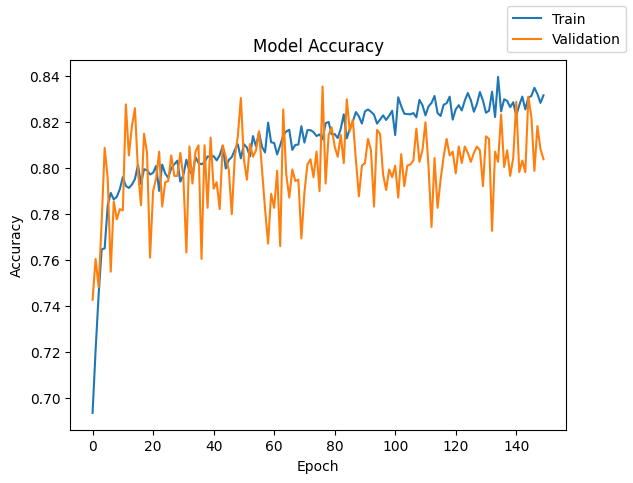

In [238]:
#Plot Accuracy curve
plot(history15,'accuracy')

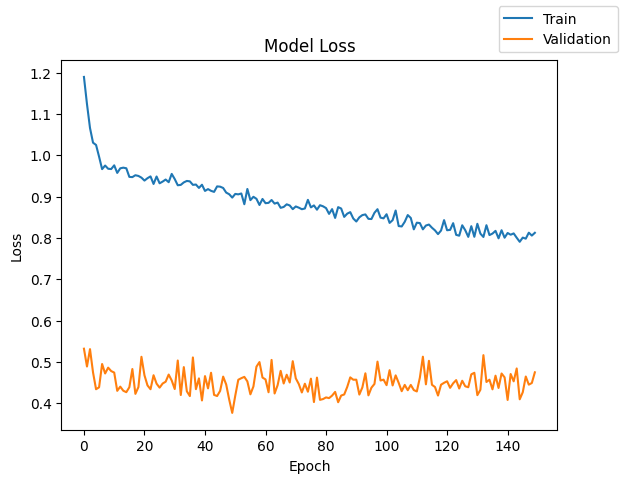

In [239]:
#PLot loss curve
plot(history15,'loss')

In [370]:
#Comparing model with other models
results.loc[15] = [2,[64,32],['tanh','relu'],150,64,"adam",[0.01,'-'],'xavier',["dropout-0.2","dropout-0.1"],history15.history["loss"][-1],history15.history["val_loss"][-1],history15.history["accuracy"][-1],history15.history["val_accuracy"][-1],round(end-start,2)]
results

# hidden layers # neurons - hidden layer  \
0                 2                 [64, 32]   
1                 2                 [64, 32]   
2                 1                       64   
3                 2                 [64, 32]   
4                 2                [128, 32]   
5                 2                 [64, 32]   
6                 2                 [64, 32]   
7                 2                 [64, 32]   
8                 2                 [64, 32]   
9                 2                 [64, 32]   
10                2                 [64, 32]   
11                2                 [64, 32]   
12                2                 [64, 32]   
14                2                 [64, 32]   
15                2                 [64, 32]   

   activation function - hidden layer   # epochs  batch size optimizer  \
0                         [relu, relu]       100        7000       sgd   
1                         [relu, relu]       100          64       sgd   
2                                 relu       100          64       sgd   
3                         [relu, tanh]       150          64       sgd   
4                         [tanh, tanh]       150          64       sgd   
5                         [tanh, tanh]       150          64       sgd   
6                         [relu, tanh]       150         128       sgd   
7                         [relu, tanh]       150          32       sgd   
8                         [relu, tanh]        50          32       sgd   
9                         [relu, tanh]       100          64       sgd   
10                        [relu, tanh]       100          32       sgd   
11                        [relu, tanh]       100          32       sgd   
12                        [relu, tanh]       150          32      adam   
14                        [relu, tanh]       150          32      adam   
15                        [tanh, relu]       150          64      adam   

   learning rate, momentum weight initializer  \
0                   [-, -]             xavier   
1                   [-, -]             xavier   
2                   [-, -]             xavier   
3                   [-, -]             xavier   
4                   [-, -]             xavier   
5                   [-, -]             xavier   
6             [0.001, 0.3]             xavier   
7             [0.001, 0.9]             xavier   
8             [0.001, 0.7]             xavier   
9             [0.001, 0.4]             xavier   
10            [0.001, 0.9]             xavier   
11            [0.001, 0.9]             xavier   
12                  [-, -]             xavier   
14                  [-, -]             xavier   
15               [0.01, -]             xavier   

                       regularization  train loss  validation loss  \
0                                   -    1.251845         0.608909   
1                                   -    0.841307         0.463114   
2                                   -    0.934649         0.493455   
3                                   -    0.830580         0.404369   
4                                   -    0.858299         0.444290   
5                                   -    0.866516         0.405230   
6                                   -    1.091327         0.538426   
7                                   -    0.769514         0.468413   
8                                   -    0.853101         0.477964   
9                                   -    1.085786         0.530878   
10                      [dropout:0.2]    0.892885         0.456302   
11  [dropout:0.2, BatchNormalization]    0.808190         0.446884   
12                                  -    0.571309         0.524371   
14         [dropout:0.5, dropout:0.5]    0.905916         0.450181   
15         [dropout-0.2, dropout-0.1]    0.812251         0.474700   

    train accuracy  validation accuracy  time (secs)  
0         0.724714             0.726667     -7129.34  
1         0.811714             0.7

In [242]:
#model performance for training datset
model_performance_classification(model15, X_train, y_train)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.853714  0.853714   0.882311  0.861997

In [243]:
#model performance with validation dataset
model_performance_classification(model15, X_val, y_val)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.803889  0.803889   0.835261  0.814333

**Observations**
- With this model, model accuracy  and recall improved for training but not for validatation.Still model with adam without dropout works better.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

**Define SMOTE for balanced data**

In [313]:
#Define SMOTE for balanced data
# Synthetic Minority Over Sampling Technique
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
X_val_over, y_val_over = sm.fit_resample(X_val, y_val)
X_test_over, y_test_over = sm.fit_resample(X_test, y_test)

In [314]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train['Exited'] == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train['Exited'] == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over['Exited'] == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over['Exited'] == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 1410
Before OverSampling, count of label '0': 5590 

After OverSampling, count of label '1': 5590
After OverSampling, count of label '0': 5590 

After OverSampling, the shape of train_X: (11180, 11)
After OverSampling, the shape of train_y: (11180, 1) 



In [315]:
print("Before OverSampling, count of label '1': {}".format(sum(y_val['Exited'] == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_val['Exited'] == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_val_over['Exited'] == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_val_over['Exited'] == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_val_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_val_over.shape))

Before OverSampling, count of label '1': 377
Before OverSampling, count of label '0': 1423 

After OverSampling, count of label '1': 1423
After OverSampling, count of label '0': 1423 

After OverSampling, the shape of train_X: (2846, 11)
After OverSampling, the shape of train_y: (2846, 1) 



In [316]:
print("Before OverSampling, count of label '1': {}".format(sum(y_test['Exited'] == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_val['Exited'] == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_test_over['Exited'] == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_test_over['Exited'] == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_test_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_test_over.shape))

Before OverSampling, count of label '1': 250
Before OverSampling, count of label '0': 1423 

After OverSampling, count of label '1': 950
After OverSampling, count of label '0': 950 

After OverSampling, the shape of train_X: (1900, 11)
After OverSampling, the shape of train_y: (1900, 1) 



In [317]:
#clear keras session
tf.keras.backend.clear_session()

In [318]:
#define model
model16 = Sequential()
model16.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model16.add(Dense(32,activation="tanh"))
model16.add(Dense(1,activation="sigmoid"))

In [319]:
#model summary
model16.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [321]:
#compile model
optimizer = tf.keras.optimizers.Adam()    # defining SGD as the optimizer to be used
model16.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [322]:
# Compute class weights using compute_class_weight
from sklearn.utils.class_weight import compute_class_weight
# Ensure y_train_over is a 1D array-like and extract unique class labels
y_train_over_values = y_train_over['Exited'].values  # Assuming 'Exited' is the target column
unique_classes = np.unique(y_train_over_values)

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=unique_classes, y=y_train_over_values)
class_weight_dict = dict(enumerate(class_weights))
#start training
start = time.time()
history16 = model16.fit(X_train_over, y_train_over, validation_data=(X_val_over,y_val_over),epochs=150,class_weight=class_weight_dict, verbose=2,batch_size = 32)

Epoch 1/150
350/350 - 3s - 8ms/step - accuracy: 0.7178 - loss: 0.5519 - val_accuracy: 0.7583 - val_loss: 0.4972
Epoch 2/150
350/350 - 2s - 6ms/step - accuracy: 0.7541 - loss: 0.5021 - val_accuracy: 0.7727 - val_loss: 0.4752
Epoch 3/150
350/350 - 1s - 3ms/step - accuracy: 0.7747 - loss: 0.4741 - val_accuracy: 0.7836 - val_loss: 0.4553
Epoch 4/150
350/350 - 1s - 2ms/step - accuracy: 0.7868 - loss: 0.4544 - val_accuracy: 0.7758 - val_loss: 0.4497
Epoch 5/150
350/350 - 1s - 4ms/step - accuracy: 0.7933 - loss: 0.4411 - val_accuracy: 0.7860 - val_loss: 0.4411
Epoch 6/150
350/350 - 1s - 2ms/step - accuracy: 0.8003 - loss: 0.4301 - val_accuracy: 0.7807 - val_loss: 0.4430
Epoch 7/150
350/350 - 1s - 4ms/step - accuracy: 0.8045 - loss: 0.4238 - val_accuracy: 0.7888 - val_loss: 0.4326
Epoch 8/150
350/350 - 1s - 4ms/step - accuracy: 0.8100 - loss: 0.4154 - val_accuracy: 0.7913 - val_loss: 0.4272
Epoch 9/150
350/350 - 1s - 2ms/step - accuracy: 0.8140 - loss: 0.4096 - val_accuracy: 0.7881 - val_loss:

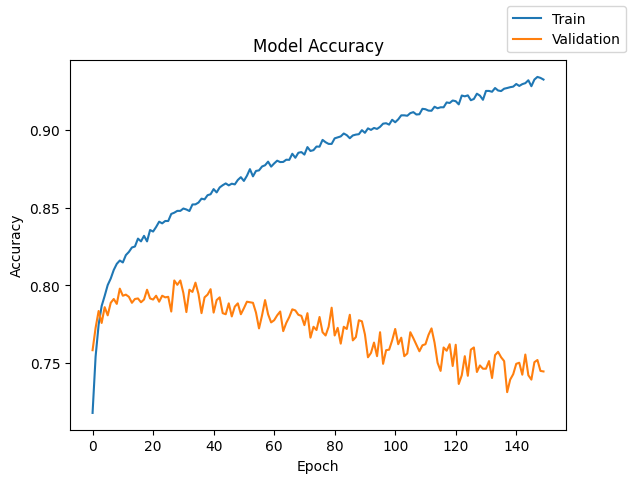

In [323]:
#Observing Accuracy curve
plot(history16,'accuracy')

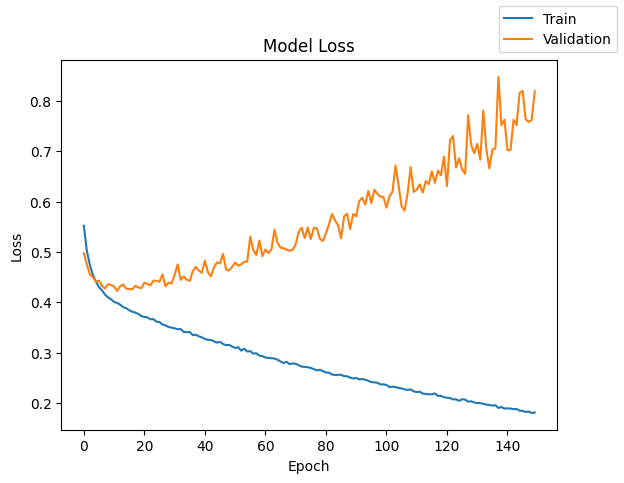

In [324]:
#observing loss curve
plot(history16,'loss')

In [371]:
#comparing model performance
results.loc[16] = [2,[64,32],['relu','tanh'],150,32,"adam",['-', "-"],"xavier",["SMOTE"],history16.history["loss"][-1],history16.history["val_loss"][-1],history16.history["accuracy"][-1],history16.history["val_accuracy"][-1],round(end-start,2)]
results

# hidden layers # neurons - hidden layer  \
0                 2                 [64, 32]   
1                 2                 [64, 32]   
2                 1                       64   
3                 2                 [64, 32]   
4                 2                [128, 32]   
5                 2                 [64, 32]   
6                 2                 [64, 32]   
7                 2                 [64, 32]   
8                 2                 [64, 32]   
9                 2                 [64, 32]   
10                2                 [64, 32]   
11                2                 [64, 32]   
12                2                 [64, 32]   
14                2                 [64, 32]   
15                2                 [64, 32]   
16                2                 [64, 32]   

   activation function - hidden layer   # epochs  batch size optimizer  \
0                         [relu, relu]       100        7000       sgd   
1                         [relu, relu]       100          64       sgd   
2                                 relu       100          64       sgd   
3                         [relu, tanh]       150          64       sgd   
4                         [tanh, tanh]       150          64       sgd   
5                         [tanh, tanh]       150          64       sgd   
6                         [relu, tanh]       150         128       sgd   
7                         [relu, tanh]       150          32       sgd   
8                         [relu, tanh]        50          32       sgd   
9                         [relu, tanh]       100          64       sgd   
10                        [relu, tanh]       100          32       sgd   
11                        [relu, tanh]       100          32       sgd   
12                        [relu, tanh]       150          32      adam   
14                        [relu, tanh]       150          32      adam   
15                        [tanh, relu]       150          64      adam   
16                        [relu, tanh]       150          32      adam   

   learning rate, momentum weight initializer  \
0                   [-, -]             xavier   
1                   [-, -]             xavier   
2                   [-, -]             xavier   
3                   [-, -]             xavier   
4                   [-, -]             xavier   
5                   [-, -]             xavier   
6             [0.001, 0.3]             xavier   
7             [0.001, 0.9]             xavier   
8             [0.001, 0.7]             xavier   
9             [0.001, 0.4]             xavier   
10            [0.001, 0.9]             xavier   
11            [0.001, 0.9]             xavier   
12                  [-, -]             xavier   
14                  [-, -]             xavier   
15               [0.01, -]             xavier   
16                  [-, -]             xavier   

                       regularization  train loss  validation loss  \
0                                   -    1.251845         0.608909   
1                                   -    0.841307         0.463114   
2                                   -    0.934649         0.493455   
3                                   -    0.830580         0.404369   
4                                   -    0.858299         0.444290   
5                                   -    0.866516         0.405230   
6                                   -    1.091327         0.538426   
7                                   -    0.769514         0.468413   
8                                   -    0.853101         0.477964   
9                                   -    1.085786         0.530878   
10                      [dropout:0.2]    0.892885         0.456302   
11  [dropout:0.2, BatchNormalization]    0.808190         0.446884   
12                                  -    0.571309         0.524371   
14         [dropout:0.5, dropout:0.5]    0.905916         0.450181   
15         [dropout-0.2, dropout-0.1]    0.8

In [326]:
#model performance for training data
model_performance_classification(model16, X_train_over, y_train_over)

350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.939267  0.939267   0.939562  0.939256

In [327]:
#model performance for validation
model_performance_classification(model16, X_val, y_val)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.808333  0.808333   0.811959  0.810045

**Observations**
- With SMOTE oversampling Accuracy and Recall for Training data improved but not for validation.It shows overfiting.
- Loss has reduced for training but increased for validation.

### **Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer**

In [328]:
#clear keras session
tf.keras.backend.clear_session()

In [329]:
#define model with dropout
model17 = Sequential()
model17.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model17.add(Dropout(0.2))
model17.add(Dense(32,activation="tanh"))
model17.add(Dropout(0.1))
model17.add(Dense(1,activation="sigmoid"))

In [330]:
#model summary
model17.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [331]:
#compile model
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model17.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [332]:
#start training model
start = time.time()
history17 = model17.fit(X_train_over, y_train_over, validation_data=(X_val_over,y_val_over),epochs=150,class_weight=class_weight_dict,verbose=2,batch_size = 64)

Epoch 1/150
175/175 - 2s - 9ms/step - accuracy: 0.5479 - loss: 0.6855 - val_accuracy: 0.7041 - val_loss: 0.6272
Epoch 2/150
175/175 - 1s - 5ms/step - accuracy: 0.6525 - loss: 0.6332 - val_accuracy: 0.7242 - val_loss: 0.5873
Epoch 3/150
175/175 - 1s - 4ms/step - accuracy: 0.6838 - loss: 0.6079 - val_accuracy: 0.7424 - val_loss: 0.5640
Epoch 4/150
175/175 - 1s - 4ms/step - accuracy: 0.6997 - loss: 0.5926 - val_accuracy: 0.7414 - val_loss: 0.5503
Epoch 5/150
175/175 - 1s - 3ms/step - accuracy: 0.7096 - loss: 0.5807 - val_accuracy: 0.7474 - val_loss: 0.5393
Epoch 6/150
175/175 - 0s - 3ms/step - accuracy: 0.7089 - loss: 0.5749 - val_accuracy: 0.7512 - val_loss: 0.5323
Epoch 7/150
175/175 - 1s - 3ms/step - accuracy: 0.7132 - loss: 0.5669 - val_accuracy: 0.7477 - val_loss: 0.5276
Epoch 8/150
175/175 - 1s - 3ms/step - accuracy: 0.7162 - loss: 0.5611 - val_accuracy: 0.7540 - val_loss: 0.5223
Epoch 9/150
175/175 - 1s - 4ms/step - accuracy: 0.7162 - loss: 0.5590 - val_accuracy: 0.7533 - val_loss:

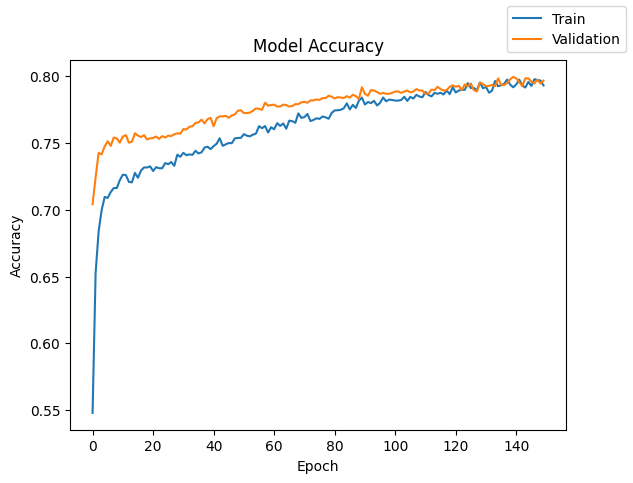

In [333]:
#Observing Accuracy plot
plot(history17,'accuracy')

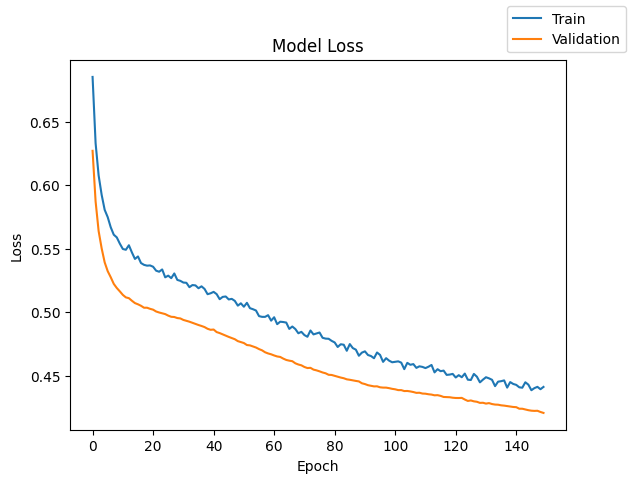

In [334]:
# Observing Loss curve
plot(history17,'loss')

In [372]:
#model comparision
results.loc[17] = [2,[64,32],['relu','tanh'],150,32,"SGD",['-', "-"],'xavier',["SMOTE"],history17.history["loss"][-1],history17.history["val_loss"][-1],history17.history["accuracy"][-1],history17.history["val_accuracy"][-1],round(end-start,2)]
results

# hidden layers # neurons - hidden layer  \
0                 2                 [64, 32]   
1                 2                 [64, 32]   
2                 1                       64   
3                 2                 [64, 32]   
4                 2                [128, 32]   
5                 2                 [64, 32]   
6                 2                 [64, 32]   
7                 2                 [64, 32]   
8                 2                 [64, 32]   
9                 2                 [64, 32]   
10                2                 [64, 32]   
11                2                 [64, 32]   
12                2                 [64, 32]   
14                2                 [64, 32]   
15                2                 [64, 32]   
16                2                 [64, 32]   
17                2                 [64, 32]   

   activation function - hidden layer   # epochs  batch size optimizer  \
0                         [relu, relu]       100        7000       sgd   
1                         [relu, relu]       100          64       sgd   
2                                 relu       100          64       sgd   
3                         [relu, tanh]       150          64       sgd   
4                         [tanh, tanh]       150          64       sgd   
5                         [tanh, tanh]       150          64       sgd   
6                         [relu, tanh]       150         128       sgd   
7                         [relu, tanh]       150          32       sgd   
8                         [relu, tanh]        50          32       sgd   
9                         [relu, tanh]       100          64       sgd   
10                        [relu, tanh]       100          32       sgd   
11                        [relu, tanh]       100          32       sgd   
12                        [relu, tanh]       150          32      adam   
14                        [relu, tanh]       150          32      adam   
15                        [tanh, relu]       150          64      adam   
16                        [relu, tanh]       150          32      adam   
17                        [relu, tanh]       150          32       SGD   

   learning rate, momentum weight initializer  \
0                   [-, -]             xavier   
1                   [-, -]             xavier   
2                   [-, -]             xavier   
3                   [-, -]             xavier   
4                   [-, -]             xavier   
5                   [-, -]             xavier   
6             [0.001, 0.3]             xavier   
7             [0.001, 0.9]             xavier   
8             [0.001, 0.7]             xavier   
9             [0.001, 0.4]             xavier   
10            [0.001, 0.9]             xavier   
11            [0.001, 0.9]             xavier   
12                  [-, -]             xavier   
14                  [-, -]             xavier   
15               [0.01, -]             xavier   
16                  [-, -]             xavier   
17                  [-, -]             xavier   

                       regularization  train loss  validation loss  \
0                                   -    1.251845         0.608909   
1                                   -    0.841307         0.463114   
2                                   -    0.934649         0.493455   
3                                   -    0.830580         0.404369   
4                                   -    0.858299         0.444290   
5                                   -    0.866516         0.405230   
6                                   -    1.091327         0.538426   
7                                   -    0.769514         0.468413   
8                                   -    0.853101         0.477964   
9                                   -    1.085786         0.530878   
10                      [dropout:0.2]    0.892885         0.456302   
11  [dropout:0.2, BatchNormalization]    0.808190         0.446884   
12           

In [336]:
#observing model performance for training data
model_performance_classification(model17, X_train_over, y_train_over)

350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.811181  0.811181   0.811379  0.811151

In [337]:
#Observing model performance for validation data
model_performance_classification(model17, X_val, y_val)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.788333  0.788333   0.826113  0.800716

**Observations**
- With this model,it improved the training loss.
- Gets better validation accuracy than Adam with SMOTE.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [338]:
#clear keras session
tf.keras.backend.clear_session()

In [339]:
#define model with dropout
model18 = Sequential()
model18.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model18.add(Dropout(0.2))
model18.add(Dense(32,activation="tanh"))
model18.add(Dropout(0.1))
model18.add(Dense(1,activation="sigmoid"))

In [341]:
#model summary
model18.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [342]:
#compile model
optimizer = tf.keras.optimizers.Adam(0.01)    # defining Adam as the optimizer to be used
model18.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [344]:
#start training model
start = time.time()
history18 = model18.fit(X_train_over, y_train_over, validation_data=(X_val_over,y_val_over),epochs=150,class_weight=cw_dict, verbose=2,batch_size = 32)

Epoch 1/150
350/350 - 2s - 7ms/step - accuracy: 0.6313 - loss: 1.2642 - val_accuracy: 0.6535 - val_loss: 0.6796
Epoch 2/150
350/350 - 1s - 2ms/step - accuracy: 0.6868 - loss: 1.1260 - val_accuracy: 0.6662 - val_loss: 0.7324
Epoch 3/150
350/350 - 1s - 2ms/step - accuracy: 0.7047 - loss: 1.0976 - val_accuracy: 0.7073 - val_loss: 0.5971
Epoch 4/150
350/350 - 1s - 4ms/step - accuracy: 0.7163 - loss: 1.0662 - val_accuracy: 0.7193 - val_loss: 0.5719
Epoch 5/150
350/350 - 1s - 4ms/step - accuracy: 0.7235 - loss: 1.0581 - val_accuracy: 0.7277 - val_loss: 0.5990
Epoch 6/150
350/350 - 1s - 4ms/step - accuracy: 0.7290 - loss: 1.0409 - val_accuracy: 0.7045 - val_loss: 0.6047
Epoch 7/150
350/350 - 1s - 3ms/step - accuracy: 0.7429 - loss: 1.0113 - val_accuracy: 0.7249 - val_loss: 0.6059
Epoch 8/150
350/350 - 1s - 3ms/step - accuracy: 0.7405 - loss: 1.0129 - val_accuracy: 0.7431 - val_loss: 0.5343
Epoch 9/150
350/350 - 2s - 4ms/step - accuracy: 0.7457 - loss: 0.9910 - val_accuracy: 0.7417 - val_loss:

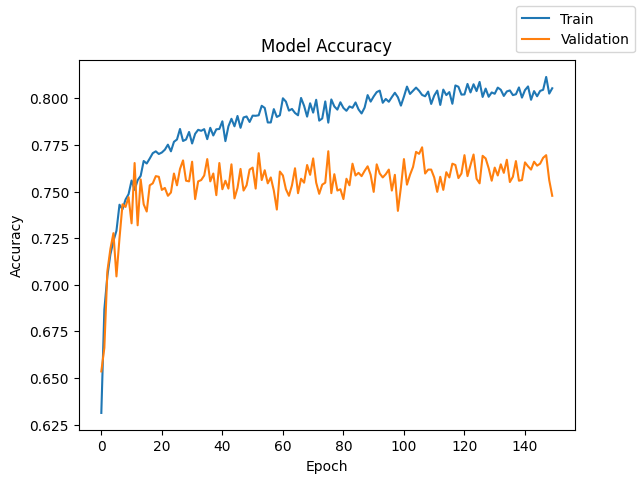

In [345]:
#plot accuracy curve
plot(history18,'accuracy')

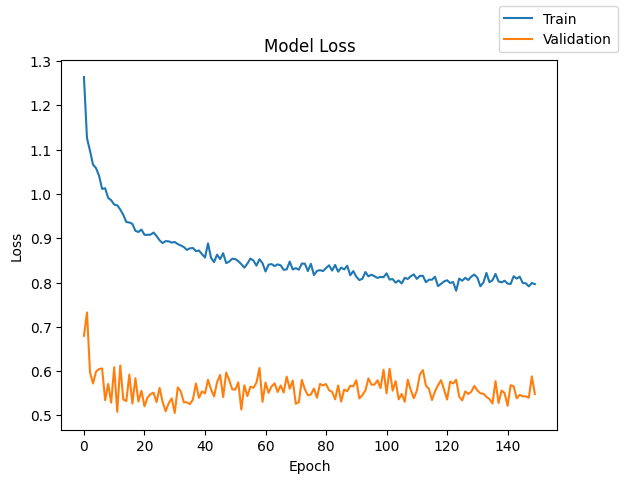

In [346]:
#plot loss curve
plot(history18,'loss')

In [373]:
#model comparision
results.loc[18] = [2,[64,32],['relu','tanh'],150,32,"adam",['0.01', "-"],'xavier',["dropout:0.2","dropout:0.1"],history18.history["loss"][-1],history18.history["val_loss"][-1],history18.history["accuracy"][-1],history18.history["val_accuracy"][-1],round(end-start,2)]
results

# hidden layers # neurons - hidden layer  \
0                 2                 [64, 32]   
1                 2                 [64, 32]   
2                 1                       64   
3                 2                 [64, 32]   
4                 2                [128, 32]   
5                 2                 [64, 32]   
6                 2                 [64, 32]   
7                 2                 [64, 32]   
8                 2                 [64, 32]   
9                 2                 [64, 32]   
10                2                 [64, 32]   
11                2                 [64, 32]   
12                2                 [64, 32]   
14                2                 [64, 32]   
15                2                 [64, 32]   
16                2                 [64, 32]   
17                2                 [64, 32]   
18                2                 [64, 32]   

   activation function - hidden layer   # epochs  batch size optimizer  \
0                         [relu, relu]       100        7000       sgd   
1                         [relu, relu]       100          64       sgd   
2                                 relu       100          64       sgd   
3                         [relu, tanh]       150          64       sgd   
4                         [tanh, tanh]       150          64       sgd   
5                         [tanh, tanh]       150          64       sgd   
6                         [relu, tanh]       150         128       sgd   
7                         [relu, tanh]       150          32       sgd   
8                         [relu, tanh]        50          32       sgd   
9                         [relu, tanh]       100          64       sgd   
10                        [relu, tanh]       100          32       sgd   
11                        [relu, tanh]       100          32       sgd   
12                        [relu, tanh]       150          32      adam   
14                        [relu, tanh]       150          32      adam   
15                        [tanh, relu]       150          64      adam   
16                        [relu, tanh]       150          32      adam   
17                        [relu, tanh]       150          32       SGD   
18                        [relu, tanh]       150          32      adam   

   learning rate, momentum weight initializer  \
0                   [-, -]             xavier   
1                   [-, -]             xavier   
2                   [-, -]             xavier   
3                   [-, -]             xavier   
4                   [-, -]             xavier   
5                   [-, -]             xavier   
6             [0.001, 0.3]             xavier   
7             [0.001, 0.9]             xavier   
8             [0.001, 0.7]             xavier   
9             [0.001, 0.4]             xavier   
10            [0.001, 0.9]             xavier   
11            [0.001, 0.9]             xavier   
12                  [-, -]             xavier   
14                  [-, -]             xavier   
15               [0.01, -]             xavier   
16                  [-, -]             xavier   
17                  [-, -]             xavier   
18               [0.01, -]             xavier   

                       regularization  train loss  validation loss  \
0                                   -    1.251845         0.608909   
1                                   -    0.841307         0.463114   
2                                   -    0.934649         0.493455   
3                                   -    0.830580         0.404369   
4                                   -    0.858299         0.444290   
5                                   -    0.866516         0.405230   
6                                   -    1.091327         0.538426   
7                                   -    0.769514         0.468413   
8                                   -    0.853101         0.477964   
9                                   -    1.085786   

In [348]:
#model performance for training data
model_performance_classification(model18, X_train_over, y_train_over)

350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.806798  0.806798    0.85225  0.800358

In [349]:
#Model performance for validation
model_performance_classification(model18, X_val, y_val)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.640556  0.640556   0.819554  0.673358

**Observations**
- With this model,there is no any improvement in performance.
- Increasing  learining rate and adding dropout layer it mitigate the issue of overfitting that we faced in model 16.

**Model 18 with He weight initializer**

In [350]:
#clear keras session
tf.keras.backend.clear_session()

In [351]:
#define model with He weight initialization technique
from tensorflow.keras import initializers
model19 = Sequential()
model19.add(Dense(64,activation="relu",kernel_initializer=initializers.HeNormal(),input_dim=X_train.shape[1]))
model19.add(Dense(32,activation="relu",kernel_initializer=initializers.HeUniform()))
model19.add(Dense(1,activation="sigmoid"))

In [352]:
#model summary
model19.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [353]:
#model compile
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model19.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])


In [354]:
#Start Training model
start = time.time()
history19 = model19.fit(X_train_over, y_train_over, validation_data=(X_val,y_val),epochs=150,class_weight=cw_dict, verbose=2,batch_size = 32)

Epoch 1/150
350/350 - 2s - 7ms/step - accuracy: 0.6008 - loss: 1.3902 - val_accuracy: 0.4372 - val_loss: 1.0401
Epoch 2/150
350/350 - 1s - 2ms/step - accuracy: 0.6614 - loss: 1.2039 - val_accuracy: 0.4983 - val_loss: 0.8999
Epoch 3/150
350/350 - 1s - 3ms/step - accuracy: 0.6819 - loss: 1.1270 - val_accuracy: 0.5339 - val_loss: 0.8645
Epoch 4/150
350/350 - 1s - 2ms/step - accuracy: 0.7036 - loss: 1.0688 - val_accuracy: 0.5383 - val_loss: 0.9011
Epoch 5/150
350/350 - 1s - 3ms/step - accuracy: 0.7182 - loss: 1.0320 - val_accuracy: 0.5500 - val_loss: 0.8670
Epoch 6/150
350/350 - 1s - 2ms/step - accuracy: 0.7315 - loss: 1.0004 - val_accuracy: 0.5667 - val_loss: 0.8895
Epoch 7/150
350/350 - 1s - 4ms/step - accuracy: 0.7360 - loss: 0.9776 - val_accuracy: 0.5906 - val_loss: 0.8045
Epoch 8/150
350/350 - 2s - 6ms/step - accuracy: 0.7465 - loss: 0.9594 - val_accuracy: 0.6256 - val_loss: 0.7544
Epoch 9/150
350/350 - 3s - 10ms/step - accuracy: 0.7540 - loss: 0.9323 - val_accuracy: 0.5561 - val_loss

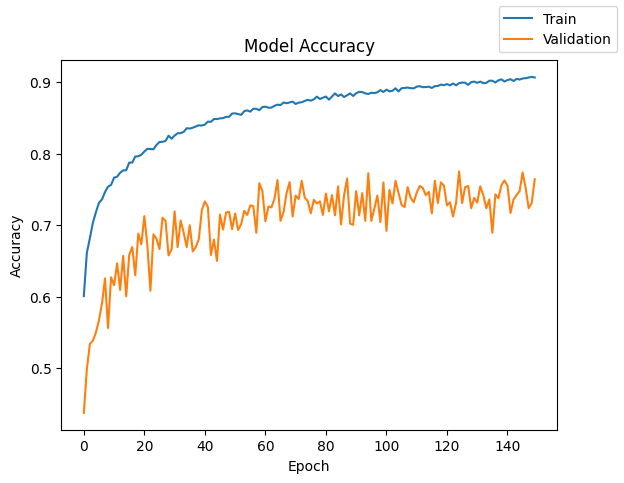

In [374]:
#Plot Accuracy curve
plot(history19,'accuracy')

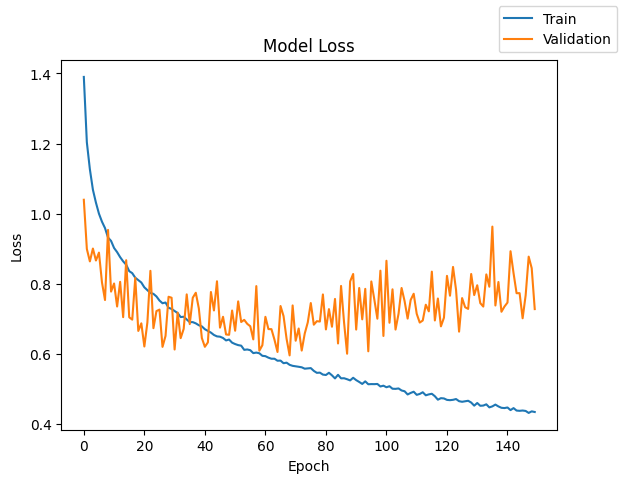

In [375]:
#plot Loss curve
plot(history19,'loss')

In [376]:
#comparing model performance
results.loc[19] = [2,[64,32],['relu','relu'],150,32,"adam",['-', "-"],['He',"He"],"-",history19.history["loss"][-1],history19.history["val_loss"][-1],history19.history["accuracy"][-1],history19.history["val_accuracy"][-1],round(end-start,2)]
results

# hidden layers # neurons - hidden layer  \
0                 2                 [64, 32]   
1                 2                 [64, 32]   
2                 1                       64   
3                 2                 [64, 32]   
4                 2                [128, 32]   
5                 2                 [64, 32]   
6                 2                 [64, 32]   
7                 2                 [64, 32]   
8                 2                 [64, 32]   
9                 2                 [64, 32]   
10                2                 [64, 32]   
11                2                 [64, 32]   
12                2                 [64, 32]   
14                2                 [64, 32]   
15                2                 [64, 32]   
16                2                 [64, 32]   
17                2                 [64, 32]   
18                2                 [64, 32]   
19                2                 [64, 32]   

   activation function - hidden layer   # epochs  batch size optimizer  \
0                         [relu, relu]       100        7000       sgd   
1                         [relu, relu]       100          64       sgd   
2                                 relu       100          64       sgd   
3                         [relu, tanh]       150          64       sgd   
4                         [tanh, tanh]       150          64       sgd   
5                         [tanh, tanh]       150          64       sgd   
6                         [relu, tanh]       150         128       sgd   
7                         [relu, tanh]       150          32       sgd   
8                         [relu, tanh]        50          32       sgd   
9                         [relu, tanh]       100          64       sgd   
10                        [relu, tanh]       100          32       sgd   
11                        [relu, tanh]       100          32       sgd   
12                        [relu, tanh]       150          32      adam   
14                        [relu, tanh]       150          32      adam   
15                        [tanh, relu]       150          64      adam   
16                        [relu, tanh]       150          32      adam   
17                        [relu, tanh]       150          32       SGD   
18                        [relu, tanh]       150          32      adam   
19                        [relu, relu]       150          32      adam   

   learning rate, momentum weight initializer  \
0                   [-, -]             xavier   
1                   [-, -]             xavier   
2                   [-, -]             xavier   
3                   [-, -]             xavier   
4                   [-, -]             xavier   
5                   [-, -]             xavier   
6             [0.001, 0.3]             xavier   
7             [0.001, 0.9]             xavier   
8             [0.001, 0.7]             xavier   
9             [0.001, 0.4]             xavier   
10            [0.001, 0.9]             xavier   
11            [0.001, 0.9]             xavier   
12                  [-, -]             xavier   
14                  [-, -]             xavier   
15               [0.01, -]             xavier   
16                  [-, -]             xavier   
17                  [-, -]             xavier   
18               [0.01, -]             xavier   
19                  [-, -]           [He, He]   

                       regularization  train loss  validation loss  \
0                                   -    1.251845         0.608909   
1                                   -    0.841307         0.463114   
2                                   -    0.934649         0.493455   
3                                   -    0.830580         0.404369   
4                                   -    0.858299         0.444290   
5                                   -    0.866516         0.405230   
6                                   -    1.091327         0.538426   
7                    

In [377]:
#model performance with training data
model_performance_classification(model18, X_train_over, y_train_over)

350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.806798  0.806798    0.85225  0.800358

In [378]:
#model performance with validation data
model_performance_classification(model18, X_val, y_val)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.640556  0.640556   0.819554  0.673358

**Observations**
- No much more improvement.Validation loss is more than training.It indicates overfitting.

## Model Performance Comparison and Final Model Selection

**Comparing Models Permance using restlts dataset and then comparing there recall values and f1_score.**

In [379]:
results

# hidden layers # neurons - hidden layer  \
0                 2                 [64, 32]   
1                 2                 [64, 32]   
2                 1                       64   
3                 2                 [64, 32]   
4                 2                [128, 32]   
5                 2                 [64, 32]   
6                 2                 [64, 32]   
7                 2                 [64, 32]   
8                 2                 [64, 32]   
9                 2                 [64, 32]   
10                2                 [64, 32]   
11                2                 [64, 32]   
12                2                 [64, 32]   
14                2                 [64, 32]   
15                2                 [64, 32]   
16                2                 [64, 32]   
17                2                 [64, 32]   
18                2                 [64, 32]   
19                2                 [64, 32]   

   activation function - hidden layer   # epochs  batch size optimizer  \
0                         [relu, relu]       100        7000       sgd   
1                         [relu, relu]       100          64       sgd   
2                                 relu       100          64       sgd   
3                         [relu, tanh]       150          64       sgd   
4                         [tanh, tanh]       150          64       sgd   
5                         [tanh, tanh]       150          64       sgd   
6                         [relu, tanh]       150         128       sgd   
7                         [relu, tanh]       150          32       sgd   
8                         [relu, tanh]        50          32       sgd   
9                         [relu, tanh]       100          64       sgd   
10                        [relu, tanh]       100          32       sgd   
11                        [relu, tanh]       100          32       sgd   
12                        [relu, tanh]       150          32      adam   
14                        [relu, tanh]       150          32      adam   
15                        [tanh, relu]       150          64      adam   
16                        [relu, tanh]       150          32      adam   
17                        [relu, tanh]       150          32       SGD   
18                        [relu, tanh]       150          32      adam   
19                        [relu, relu]       150          32      adam   

   learning rate, momentum weight initializer  \
0                   [-, -]             xavier   
1                   [-, -]             xavier   
2                   [-, -]             xavier   
3                   [-, -]             xavier   
4                   [-, -]             xavier   
5                   [-, -]             xavier   
6             [0.001, 0.3]             xavier   
7             [0.001, 0.9]             xavier   
8             [0.001, 0.7]             xavier   
9             [0.001, 0.4]             xavier   
10            [0.001, 0.9]             xavier   
11            [0.001, 0.9]             xavier   
12                  [-, -]             xavier   
14                  [-, -]             xavier   
15               [0.01, -]             xavier   
16                  [-, -]             xavier   
17                  [-, -]             xavier   
18               [0.01, -]             xavier   
19                  [-, -]           [He, He]   

                       regularization  train loss  validation loss  \
0                                   -    1.251845         0.608909   
1                                   -    0.841307         0.463114   
2                                   -    0.934649         0.493455   
3                                   -    0.830580         0.404369   
4                                   -    0.858299         0.444290   
5                                   -    0.866516         0.405230   
6                                   -    1.091327         0.538426   
7                    

**Observations**
- From the above dataframe,we can choose model 15,12,5 and 3 which have less loss and better accuracy for training and validatation data.


Now,Compare there performance with respect to Accuracy,Recall,Precision and F1_score

In [380]:
models_train_comp_df = pd.concat(
    [model_performance_classification(model15, X_train, y_train).T,
     model_performance_classification(model12, X_train, y_train).T,
     model_performance_classification(model5, X_train, y_train).T,
     model_performance_classification(model3, X_train, y_train).T,
  ],
    axis=1,
)
models_train_comp_df.columns = ["Model15 With Adam with dropout", "Model12 with Adam", "Model5-Sgd[tanh,tanh]", "Model3-Sgd[relu, tanh]"]

print("Training performance comparison:")
models_train_comp_df

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training performance comparison:


Model15 With Adam with dropout  Model12 with Adam  \
Accuracy                         0.853714           0.859571   
Recall                           0.853714           0.859571   
Precision                        0.882311           0.898801   
F1 Score                         0.861997           0.869130   

           Model5-Sgd[tanh,tanh]  Model3-Sgd[relu, tanh]  
Accuracy                0.831143                0.840143  
Recall                  0.831143                0.840143  
Precision               0.854051                0.860450  
F1 Score                0.839051                0.847176

In [381]:
models_val_comp_df = pd.concat(
    [model_performance_classification(model15, X_val, y_val).T,
     model_performance_classification(model12, X_val, y_val).T,
     model_performance_classification(model5, X_val, y_val).T,
     model_performance_classification(model3, X_val, y_val).T,
  ],
    axis=1,
)
models_val_comp_df.columns = ["Model15 With Adam with dropout", "Model12 with Adam", "Model5-Sgd[tanh,tanh]", "Model3-Sgd[relu, tanh]"]

print("Validation performance comparison:")
models_val_comp_df

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Validation performance comparison:


Model15 With Adam with dropout  Model12 with Adam  \
Accuracy                         0.803889           0.786111   
Recall                           0.803889           0.786111   
Precision                        0.835261           0.825131   
F1 Score                         0.814333           0.798836   

           Model5-Sgd[tanh,tanh]  Model3-Sgd[relu, tanh]  
Accuracy                0.817222                0.813889  
Recall                  0.817222                0.813889  
Precision               0.841289                0.836804  
F1 Score                0.825580                0.822053

**Observations**
- From above comparision table Model5 with SGD is the winner.
- But also we will check it's performance with unseen data before giving any conclusion.

**Model evaluation on the test data**

**Model 12**

In [382]:
#evaluate model 12 with test data
model12.evaluate(X_test,y_test)
test_pred=model12.predict(X_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7789 - loss: 0.5422
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


              precision    recall  f1-score   support

           0       0.91      0.82      0.86       950
           1       0.49      0.68      0.57       250

    accuracy                           0.79      1200
   macro avg       0.70      0.75      0.72      1200
weighted avg       0.82      0.79      0.80      1200



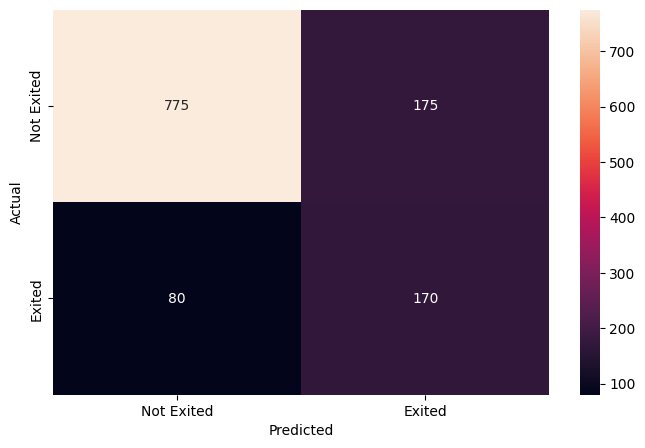

In [383]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Convert predictions to binary using a threshold (e.g., 0.5)
test_pred_binary = np.where(test_pred > 0.5, 1, 0)

# Now use the binary predictions in the classification_report
print(classification_report(y_test, test_pred_binary))

cm = confusion_matrix(y_test, test_pred_binary)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

***Model 15**

In [384]:
#evaluate model 14 with test data
model15.evaluate(X_test,y_test)
test_pred=model15.predict(X_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8160 - loss: 0.4735
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


              precision    recall  f1-score   support

           0       0.91      0.85      0.88       950
           1       0.54      0.69      0.61       250

    accuracy                           0.81      1200
   macro avg       0.73      0.77      0.74      1200
weighted avg       0.84      0.81      0.82      1200



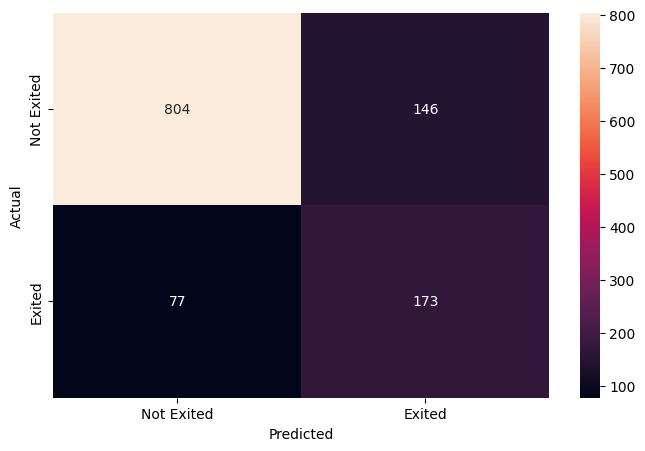

In [385]:
# Convert predictions to binary using a threshold (e.g., 0.5)
test_pred_binary = np.where(test_pred > 0.5, 1, 0)

# Now use the binary predictions in the classification_report
print(classification_report(y_test, test_pred_binary))

cm = confusion_matrix(y_test, test_pred_binary)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Model 5**

In [386]:
##evaluate model 7 with test data
model5.evaluate(X_test,y_test)
test_pred=model5.predict(X_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8175 - loss: 0.4029
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


              precision    recall  f1-score   support

           0       0.92      0.86      0.89       950
           1       0.56      0.70      0.62       250

    accuracy                           0.82      1200
   macro avg       0.74      0.78      0.76      1200
weighted avg       0.84      0.82      0.83      1200



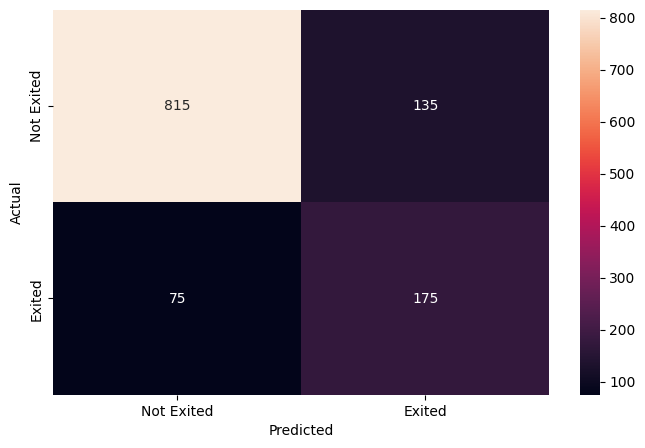

In [387]:
# Convert predictions to binary using a threshold (e.g., 0.5)
test_pred_binary = np.where(test_pred > 0.5, 1, 0)

# Now use the binary predictions in the classification_report
print(classification_report(y_test, test_pred_binary))

cm = confusion_matrix(y_test, test_pred_binary)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Model 3**

In [388]:
#Evaluate model 3
model3.evaluate(X_test,y_test)
test_pred=model3.predict(X_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8221 - loss: 0.4165
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


              precision    recall  f1-score   support

           0       0.91      0.86      0.88       950
           1       0.56      0.67      0.61       250

    accuracy                           0.82      1200
   macro avg       0.73      0.77      0.75      1200
weighted avg       0.84      0.82      0.83      1200



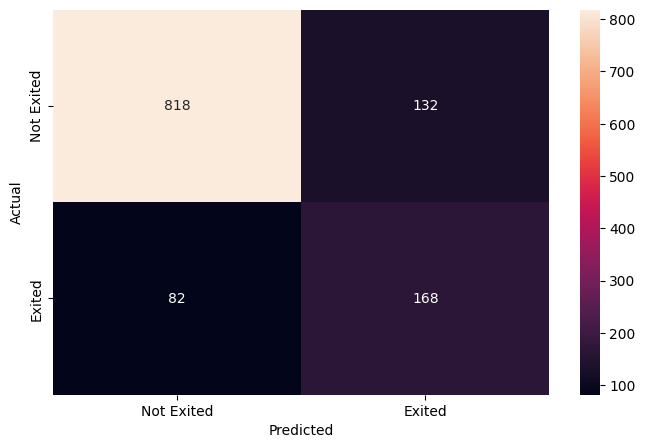

In [390]:
# Convert predictions to binary using a threshold (e.g., 0.5)
test_pred_binary = np.where(test_pred > 0.5, 1, 0)

# Now use the binary predictions in the classification_report
print(classification_report(y_test, test_pred_binary))

cm = confusion_matrix(y_test, test_pred_binary)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations**
- From the above results,model 5 and 3 give little bit more recall and F1_score than others models.Hence,**model 5** with two hidden layer with activation function **tanh** and model 3 with SGD optimizer with two hidden layers [64,32] with relu and tanh activation function are the winner.

## Actionable Insights and Business Recommendations

* Bank should consider the final model from this project to predict  with a reasonable degree of accuracy whether bank customer  is likely to exite or not, and this process seems to be easier and more time-efficient than other methods.
* Bank need to find out why old age customers are exited than young one.
* Retaining older customers in a bank requires a mix of personalized service, trust-building, digital adaptation, and value-driven engagement.By understanding their needs, simplifying their banking experience, and adding value, you can retain older customers and prevent churn.
* Bank should
  - **Loyalty Programs**: Reward them for their long-term association with bonus interest rates, cashback, or special investment options.
  - **Referral Benefits**: Encourage them to bring family members by offering family banking benefits or joint account perks.
  - **Personalized Offer**s: Send targeted offers based on their banking behavior—discounts on medical services, travel benefits, or customized investment plans.
* As we observed, German customers has high exite ratio than other locations.So that try to find out cause behind it.Start more loyalty programs, referral benefit as I mensioned early.
* Further investigate why customers who purchased more than 2 products have such a high churn rate.To attract customers to a banking product, you need a customer-centric strategy that highlights the unique benefits, ease of use, and trustworthiness of the product.
* Try to understand customers need.To attract customers, a banking product must be valuable, easy to use, and well-promoted. Combining competitive offers, digital convenience, targeted marketing, and trust-building will ensure success.






In [10]:
!jupyter nbconvert --to html NN_Project4_Bank_Churn_Prediction_Kirti_Kamerkar_1.ipynb

[NbConvertApp] Converting notebook NN_Project4_Bank_Churn_Prediction_Kirti_Kamerkar_1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 65 image(s).
[NbConvertApp] Writing 4560860 bytes to NN_Project4_Bank_Churn_Prediction_Kirti_Kamerkar_1.html


<font size=6 color='blue'>Power Ahead</font>
___